<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data preprocessing](#2.2)

> - 2.2.1 [Drop column `ID` and `Insurance`](#2.2.1)
> - 2.2.2 [Rename column `Sepssis`](#2.2.2)  
> - 2.2.3 [Convert `Sepsis` in to binary number](#2.2.3)
> - 2.2.4 [Convert Data Type](#2.2.4)  

2.3 [Drop column](#2.3)

> - 2.3.1 [Check correllation for dropping](#2.3.1)
> - 2.3.2 [Check missing values for dropping](#2.3.2)  

2.4 [Upper Case the content](#2.4)

2.5 [Extra-whitespaces](#2.5)

2.6 [Descriptive statistics for Central Tendency](#2.6)

> - 2.6.1 [Overview statistics](#2.6.1)
> - 2.6.2 [Domain Knowledge](#2.6.2)  

2.7 [Save The Intermediate Data](#2.8)

<br>

### 3. [Data exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

> - 3.1.1 [Distribution of Length Of Stay](#3.1.1) 
> - 3.1.2 [Distribution of Length Of Stay](#3.1.2) 

3.2 [Frequency of each corresponiding Target variable type](#3.2)

> - 3.2.1 [How old are they?](#3.2.1) 
> - 3.2.2 [How much they weight?](#3.2.2) 
> - 3.2.3 [How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?](#3.2.3) 
> - 3.2.4 [](#3.2.4) 
> - 3.2.5 [](#3.2.5) 
> - 3.2.6 [](#3.2.6) 
> - 3.2.7 [](#3.2.7) 
> - 3.2.8 [](#3.2.8) 
 


3.3 [Summary](#3.3)

<br>

 ## chưa sửa phía sau
### 4. [Feature Engineering](#4)

3.1 [Separating dependent and independent variables](#3.1)

3.2 [Encoding](#3.2)

> - 4.2.1 [Binary Encoding for Name and Ticket Feature:](#3.2.1)
> - 4.2.2 [Binary Encoding for Embarked Feature:](#3.2.2)

3.3 [Separating dependent and independent variables](#3.3)

3.4 [Splitting the training data](#3.4)

3.5 [Feature Scaling](#3.5)

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

> - 5.1.1 [Logistic Regression without GridSearch](#5.1.1)
>> - 5.1.1.a [Train model](#5.1.1.a) 
>> - 5.1.1.b [Evaluating a classification model](#5.1.1.b) 
> - 5.1.2 [Logistic Regression with GridSearch](#5.1.2)
>> - 5.1.1.a [Train model](#5.1.1.a) 
>> - 5.1.1.b [Evaluating a classification model](#5.1.1.b) 



<br>

### 5. [Conculsions](#5)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> Sepsis is the extreme repsonse of the body to an infection. Hence, it has not only been a life-threatening condition, but also a great concern of medical care. Since then, it is the challenge for Intensive Care Unit (ICUs) to detect the sepsis condition in their paitents. Therefore, for an ICU, detecting the sepsis is for not only minimising the consequences of health complications but also to probably managing ICU resources (eg: bed availability, etc..). </p>

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> In this assignment, I will develop a machine learning model to predict if a patient will develop sepsis in the period of their stay in the ICU, based on provided attributes (features) related to: patient characteristics, diagnoses, treatments, services, hospital charges and patients socio-economic background.
</p>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Age </span> get the highest probability get Sepsis?</li>
    <li>Which <span style="color:#122ecc;">M11 (Body mass index)</span> get the highest probability get Sepsis?</li>
    <li>How high <span style="color:#122ecc;">PL (Blood Work Result-1 (mu U/ml))</span> that the Sepsis is likely to get?</li>
    <li>How high <span style="color:#122ecc;">PL (Blood Work Result-1 (mu U/ml))</span> that the Sepsis is likely to get?</li>
    <li>How high <span style="color:#122ecc;">PR ((Blood Pressure (mm Hg))</span> that the Sepsis is likely to get?</li>
    <li>How high <span style="color:#122ecc;">SK (Blood Work Result-2 (mm)</span> that the Sepsis is likely to get?</li>
    <li>How high <span style="color:#122ecc;">TS (Blood Work Result-3 (mu U/ml))</span> that the Sepsis is likely to get?</li>
    <li>How high <span style="color:#122ecc;">BD2 (Blood Work Result-4 (mu U/ml))</span> that the Sepsis is likely to get?</li>

</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install --upgrade scikit-learn==0.20.3

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
import missingno as msno


#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

#Libraries for feature scaling
from sklearn.preprocessing import StandardScaler

#Libraries for Validation
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Libraries for Training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\william\anaconda3\lib\site-packages\scikit_learn-0.24.2.dist-info\
   from C:\Users\William\anaconda3\Lib\site-packages\~cikit_learn-0.24.2.dist-info
  Moving to c:\users\william\anaconda3\lib\site-packages\sklearn\
   from C:\Users\William\anaconda3\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\William\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\William\\AppData\\Local\\Temp\\pip-install-mwc1w4lt\\scikit-learn_9397ef4971314c5a943c61b82a3ada3f\\setup.py'"'"'; __file__='"'"'C:\\Users\\William\\AppData\\Local\\Temp\\pip-install-mwc1w4lt\\scikit-learn_9397ef4971314c5a943c61b82a3ada3f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\William\AppData\Local\Temp\pip-wheel-dg71cgks'
       cwd: C:\Users\William\AppData\Local\Temp\pip-install-mwc1w4lt\scikit-learn_9397ef4971314c5a943c61b82a3ada3f\
  Complete output (675 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:


    copying sklearn\utils\extmath.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\fixes.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\graph.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\linear_assignment_.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\metaestimators.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\mocking.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\multiclass.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\optimize.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\random.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\setup.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\sparsefuncs.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\stats.py -> build\lib.win-amd64-3.9\sklearn\utils
    copying sklearn\utils\testing.py -> build\l

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
In order to have an accurate result, data prepration step must be done precisely. First of all, data from the csv file which is named "survey_results_public.csv" is loaded by "read_csv" in pandas function, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True". After that, all the data types must be checked to ensure no column has incorrect data types assigned. Having been checked the data types, the loaded data is cleaned by 6 steps which are typos, extra-whitespaces, upper/lower-case, sanity checks, missing values, and categorical data. </p>


> **Sample train Dataset**

In [3]:
#Import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
#data is imported by "read_csv() function of pandas"
train = pd.read_csv("Data/Paitients_Files_Train.csv", delimiter=',', skipinitialspace = True)

train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(train.shape))

# drop Unnamed, it is just a number given to identify each house
train.head(3)

The shape of the ORGINAL data is (row, column): (599, 11)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive


> **Sample test Dataset**

In [4]:
test = pd.read_csv("Data/Paitients_Files_Test.csv", delimiter=',', skipinitialspace = True)

test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(test.shape))

# drop Unnamed, it is just a number given to identify each house
test.head(3)

The shape of the ORGINAL data is (row, column): (169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


<a id="1.5"></a>
# 🔈 1.5 Data Information
****

> **Sample train Dataset**

In [5]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(599, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
None


> **Sample test Dataset**

In [6]:
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the test data is (row, column):(169, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB
None


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">The dataset is splitted into two groups: </p>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Train set (train.csv)</li>
    <li>Test set (test.csv)</li>
</ul>

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">Now let's go through the features and describe a little: </p>

***
**Categorical:** 
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Sepsis** (Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise)
            Negative
            Positive
***
**Numeric:**
- **Discrete**
  >  - **PRG** (Plasma glucose)

- **Continous**
>  - **Age** (Patients age (years))
>  - **PL** (Platelets levels in the blood. Blood Work Result-1 (mu U/ml))
>  - **PR** (Pulse rate: Blood Pressure (mm Hg))
>  - **SK** (A sodium blood test. Blood Work Result-2 (mm)
>  - **TS** (Blood Work Result-3 (mu U/ml))
>  - **M11** (Body mass index (weight in kg/(height in m)^2)
>  - **BD2** (Blood Work Result-4 (mu U/ml))



<a id="2.2"></a>
# ❌ 2.2 Data preprocessing
***

<a id="2.2.1"></a>
## 🔧 2.2.1 Drop column `ID` and `Insurance`
***
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> In order to avoid data leakage, I desire to drop column <span style="color:#122ecc;">ID </span></li>
    <li> I also desire to drop <span style="color:#122ecc;">Insurance </span> since it is not related to patient's condition and therefore are not attributes.</li>
</ul>

In [7]:
train = train.drop(columns=['ID', 'Insurance'])
test = test.drop(columns=['ID', 'Insurance'])

<a id="2.2.2"></a>
## ⛏ 2.2.2 Rename column `Sepssis`
***
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">Since <span style="color:#122ecc;">Sepssis </span> is not correctly spelled so I want to rewrite it.</p>

In [8]:
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

<a id="2.2.3"></a>
## ⌛ 2.2.3 Convert `Sepsis` in to binary number
***

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">Since <span style="color:#122ecc;">Sepssis </span> just have the <span style="color:#122ecc;">Positive </span> and <span style="color:#122ecc;">Negative </span> values so I want to convert them to 0 for Negative and 1 is for Positive</p>

In [9]:
train.loc[train['Sepsis'].isin(['Positive']), 'Sepsis'] = '1'
train.loc[train['Sepsis'].isin(['Negative']), 'Sepsis'] = '0'

<a id="2.2.4"></a>
## 🦄 2.2.4 Convert Data Type:
***

In [10]:
train['Sepsis'] = train['Sepsis'].astype('int')

<a id="2.3"></a>
# ❌ 2.3 Drop column
***

<a id="2.3.1"></a>
## 🐷 2.3.1 Check correllation for dropping
***
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> The Correlation of all columns are calculated and if: </p>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> 0.2 = weak</li>
    <li> 0.5 = medium</li>
    <li> 0.8 = strong</li>
    <li> 0.9 = very strong</li>

</ul>

In [11]:
## get the most important variables. 
corr = train.corr()**2
corr.Sepsis.sort_values(ascending=False)

Sepsis    1.000000
PL        0.202247
M11       0.099789
Age       0.044198
PRG       0.042897
BD2       0.032964
TS        0.021284
SK        0.005713
PR        0.003732
Name: Sepsis, dtype: float64

In [12]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='Blues')

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.207115
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.449719
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,0.061086
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,0.075585
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.145892
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.315894
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.181561
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.210234
Sepsis,0.207115,0.449719,0.061086,0.075585,0.145892,0.315894,0.181561,0.210234,1.000000


### ------------> OBSERVATION
***
- Our target variable is `Sepsis`. So if there are any columns have high correlation (>= 0.5) I desire to drop them.
- Columns have correllation to each other: 
> - Age, PRG
- I want to drop `PRG` since in this specific dataset it does not have the unit and I do not have enough knowledge to deal with this column

In [13]:
train = train.drop(columns=['PRG'])
test = test.drop(columns=['PRG'])

<a id="2.3.2"></a>
## 👀 2.3.2 Check missing values for dropping
***

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 
</p>

### I also want to drop those columns having the missing values that is higher than 50 percent, since If I impute them, there will be bias in my data

> **Sample train Dataset**

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


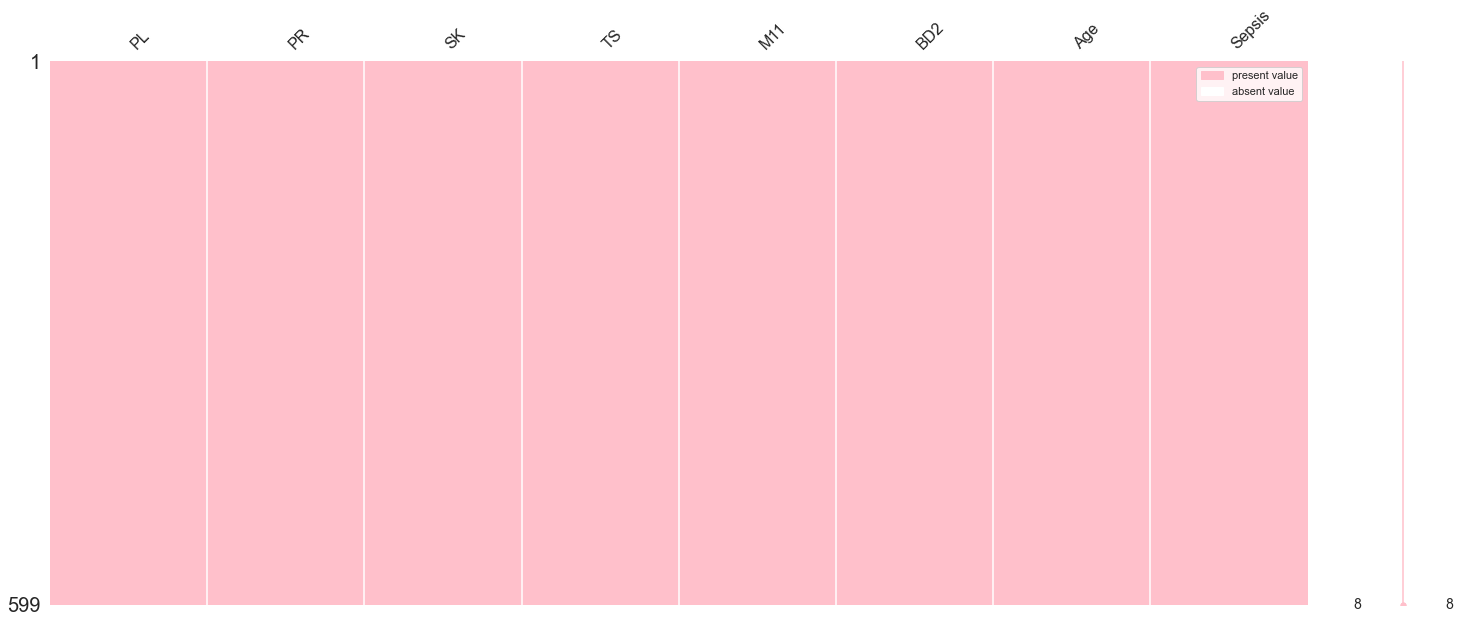

In [14]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(train).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(train, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

> **Sample test Dataset**

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


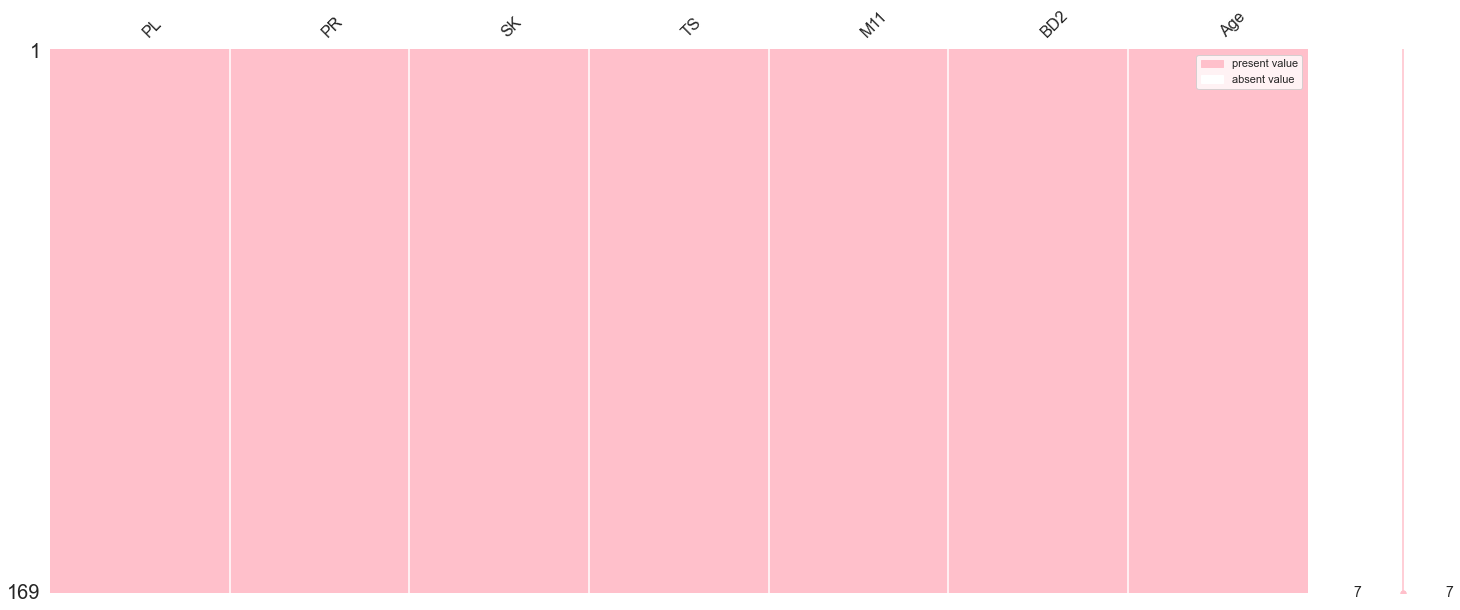

In [15]:
# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(test).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
Suprisingly, there is no missing data in both of the dataset.

<a id="2.4"></a>
# 💭 2.4 Upper Case the content
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

</p>

> **Sample train Dataset**

In [16]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1


> **Sample test Dataset**

In [17]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,PL,PR,SK,TS,M11,BD2,Age
0,109,38,18,120,23.1,0.407,26
1,108,88,19,0,27.1,0.400,24
2,96,0,0,0,23.7,0.190,28


<a id="2.5"></a>
# 📚 2.5 Extra-whitespaces:
***

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.
</p>

In [18]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(train)
whitespace_remover(test)

<a id="2.6"></a>
# 📊 2.6 Descriptive statistics for Central Tendency
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> I want to check the validation of the numerical columns:</p>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> 1. Check overview statistics</li>
    <li> 2. Check the scale</li>
    <li> 3. Check outliers</li>

</ul>

<a id="2.6.1"></a>
# 🔭 2.6.1 Overview statistics
****

> **Sample train Dataset**

In [19]:
# see the static of all numerical column
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Sepsis,599.0,0.347245,0.476492,0.000,0.000,0.000,1.000,1.00


<AxesSubplot:>

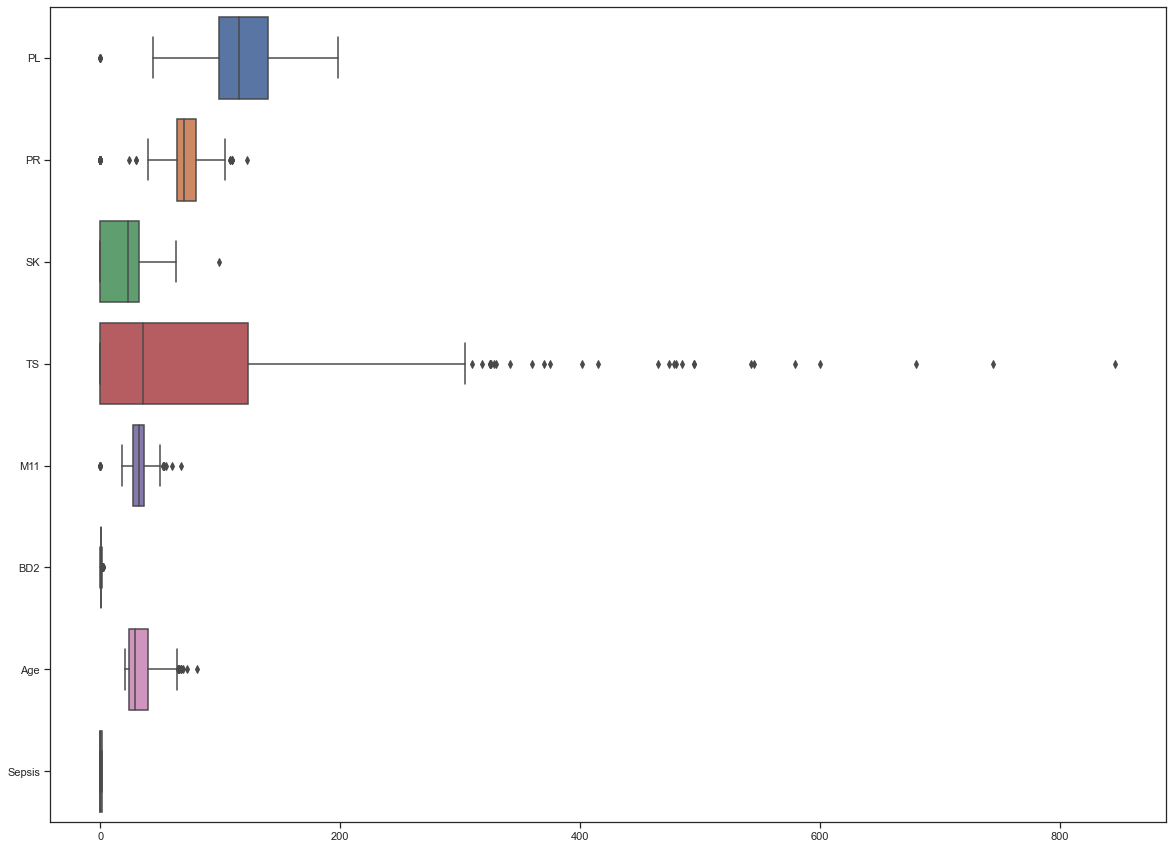

In [20]:
plt.rcParams['figure.figsize'] = [20, 15]
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=train,orient="h")

### ---------> OBSERVATION
****
The scale of this data set is considerably large so that I desire to have some of the domain knowlegde in order to detect the outliers.

## Box plot for numerical columns
****

<AxesSubplot:>

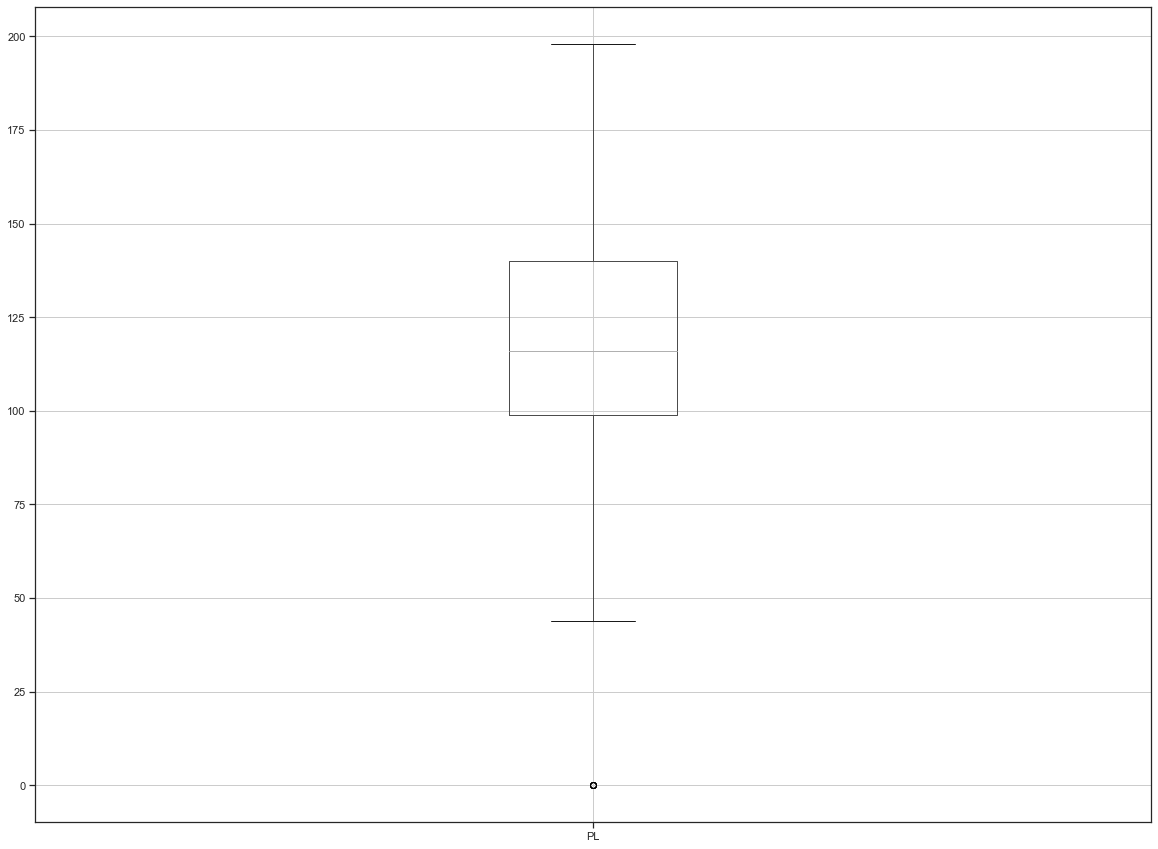

In [21]:
train.boxplot('PL')

<AxesSubplot:>

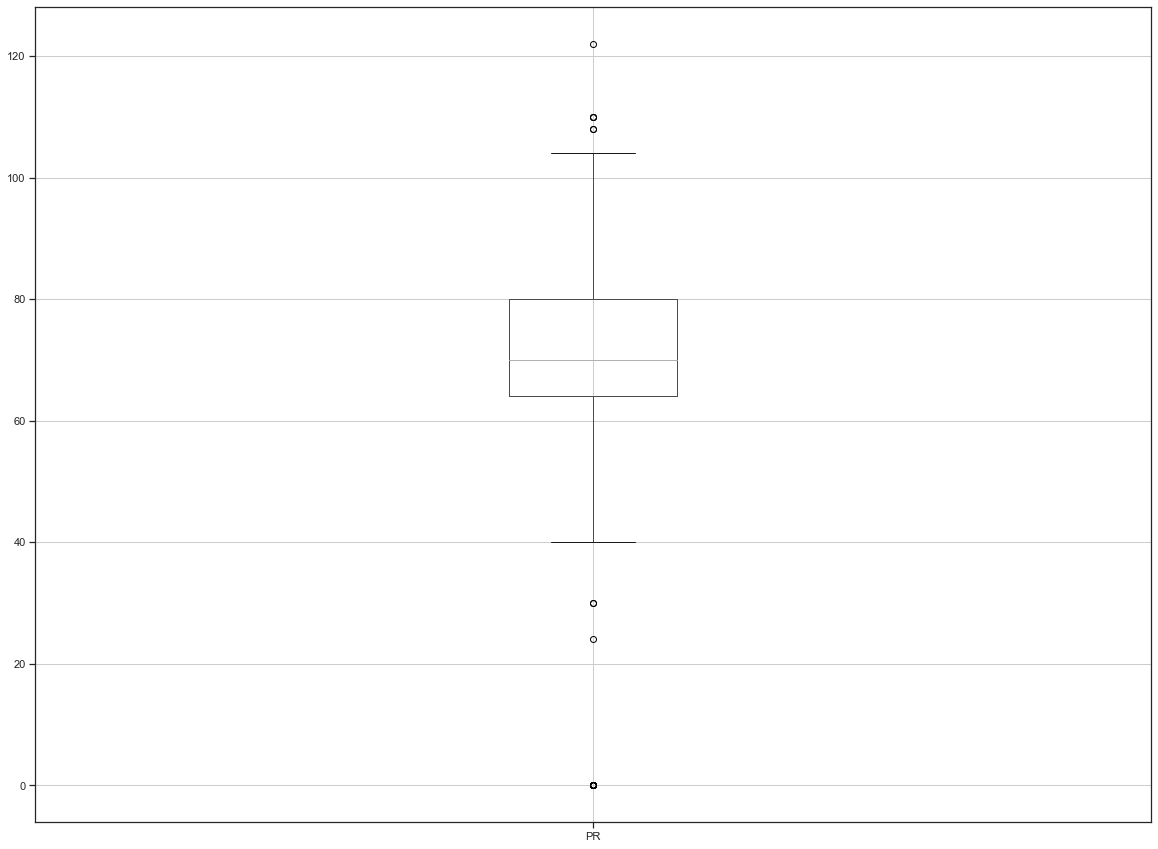

In [22]:
train.boxplot('PR')

<AxesSubplot:>

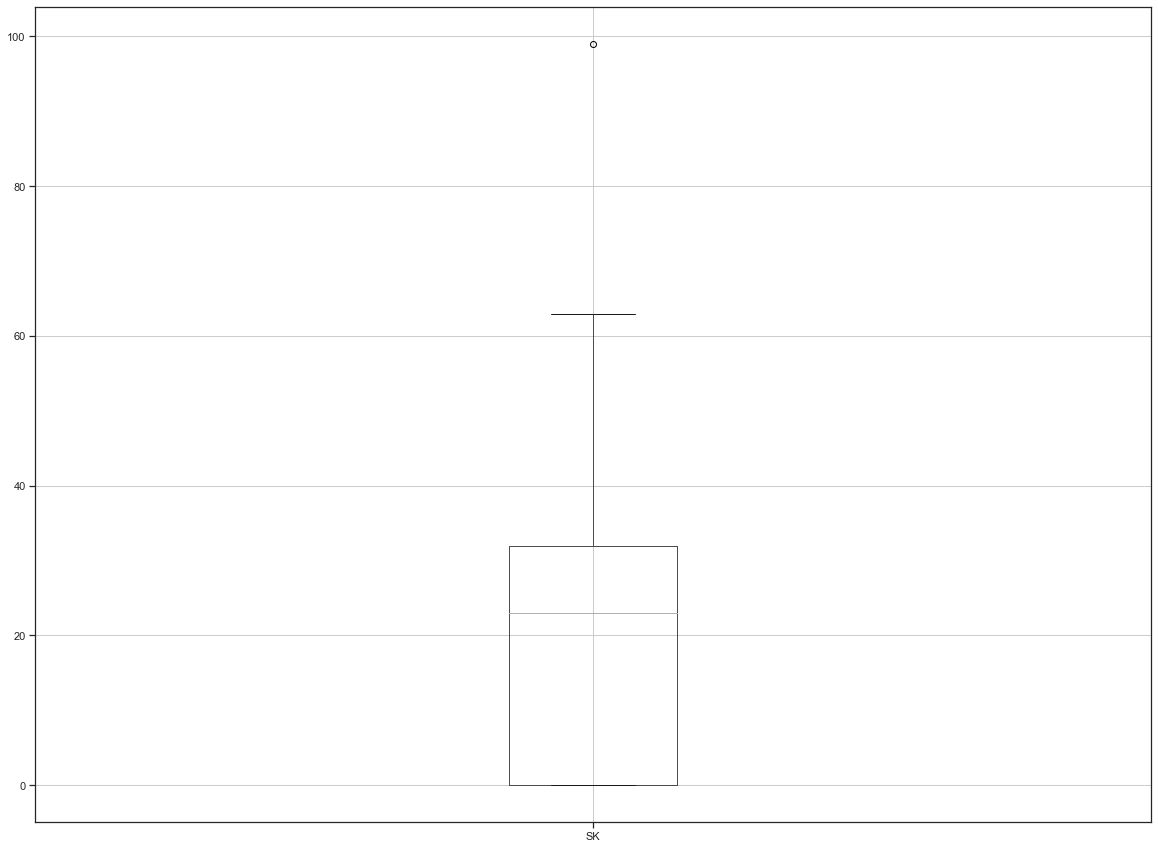

In [23]:
train.boxplot('SK')

<AxesSubplot:>

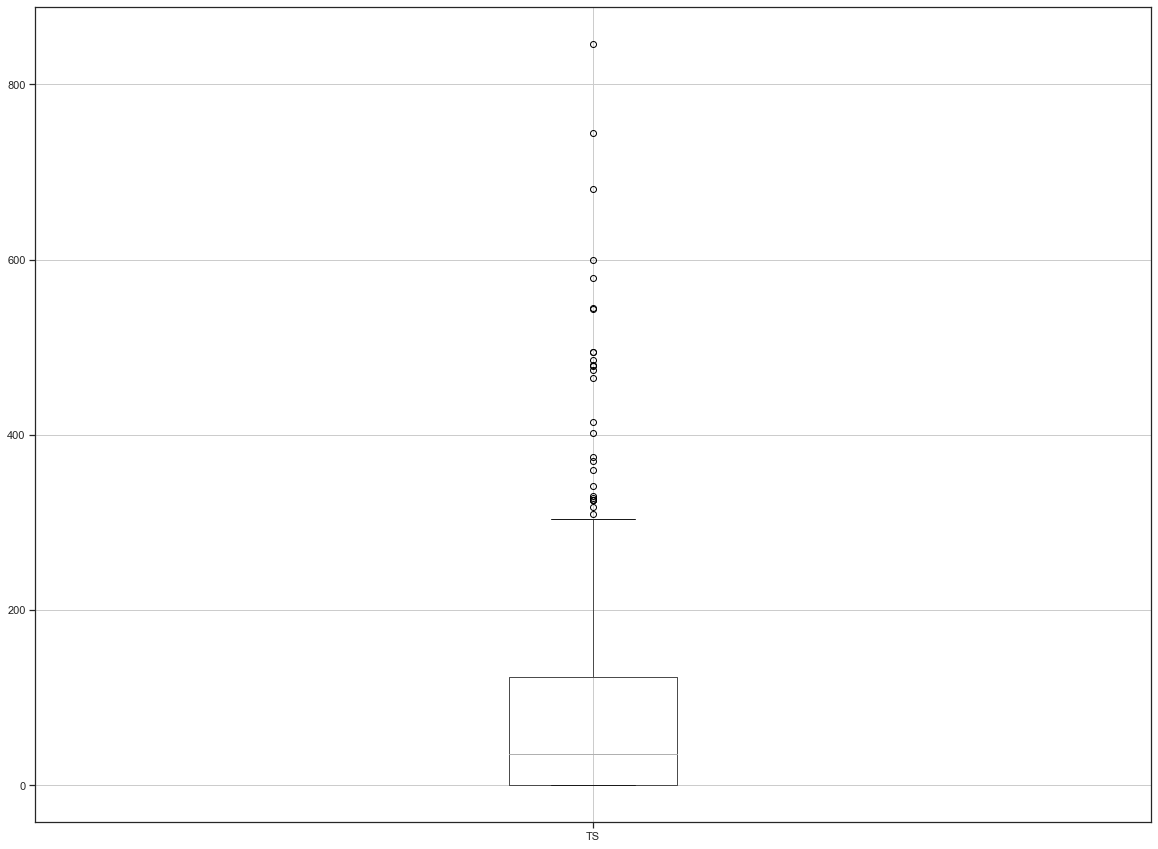

In [24]:
train.boxplot('TS')

<AxesSubplot:>

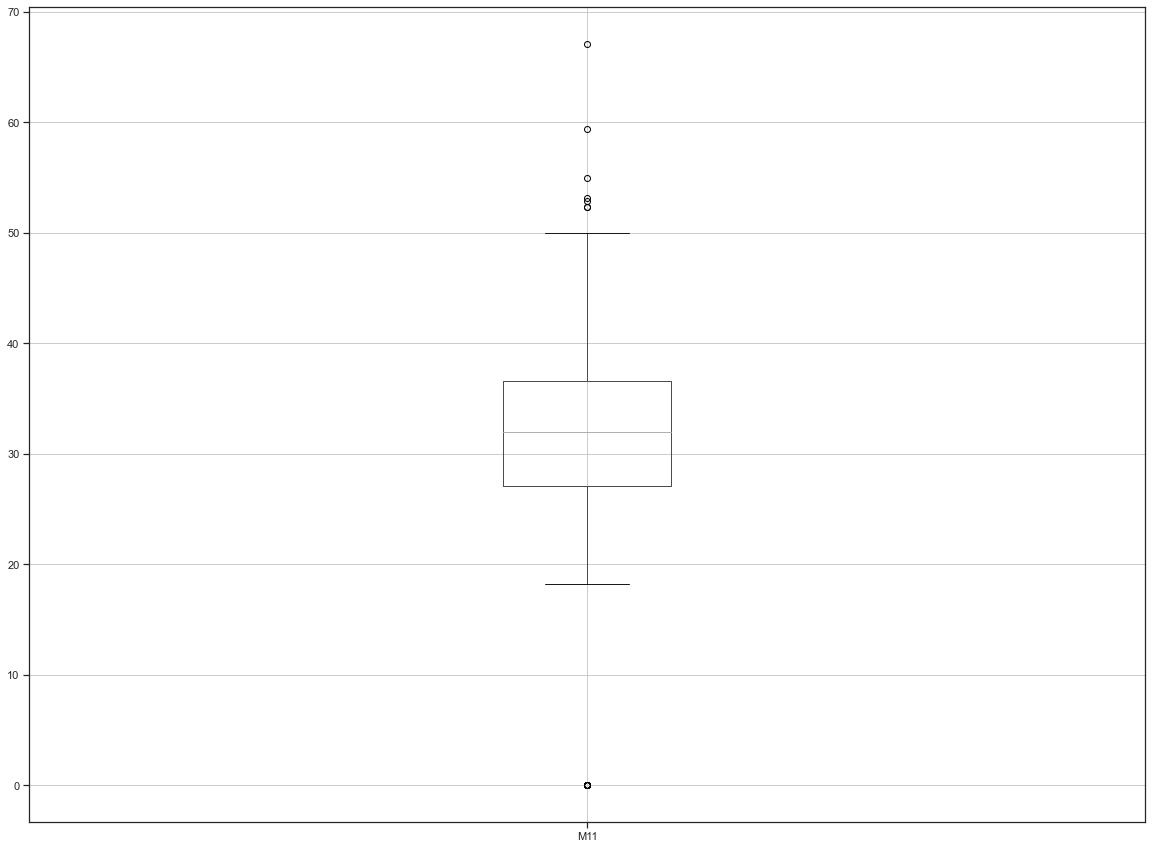

In [25]:
train.boxplot('M11')

<AxesSubplot:>

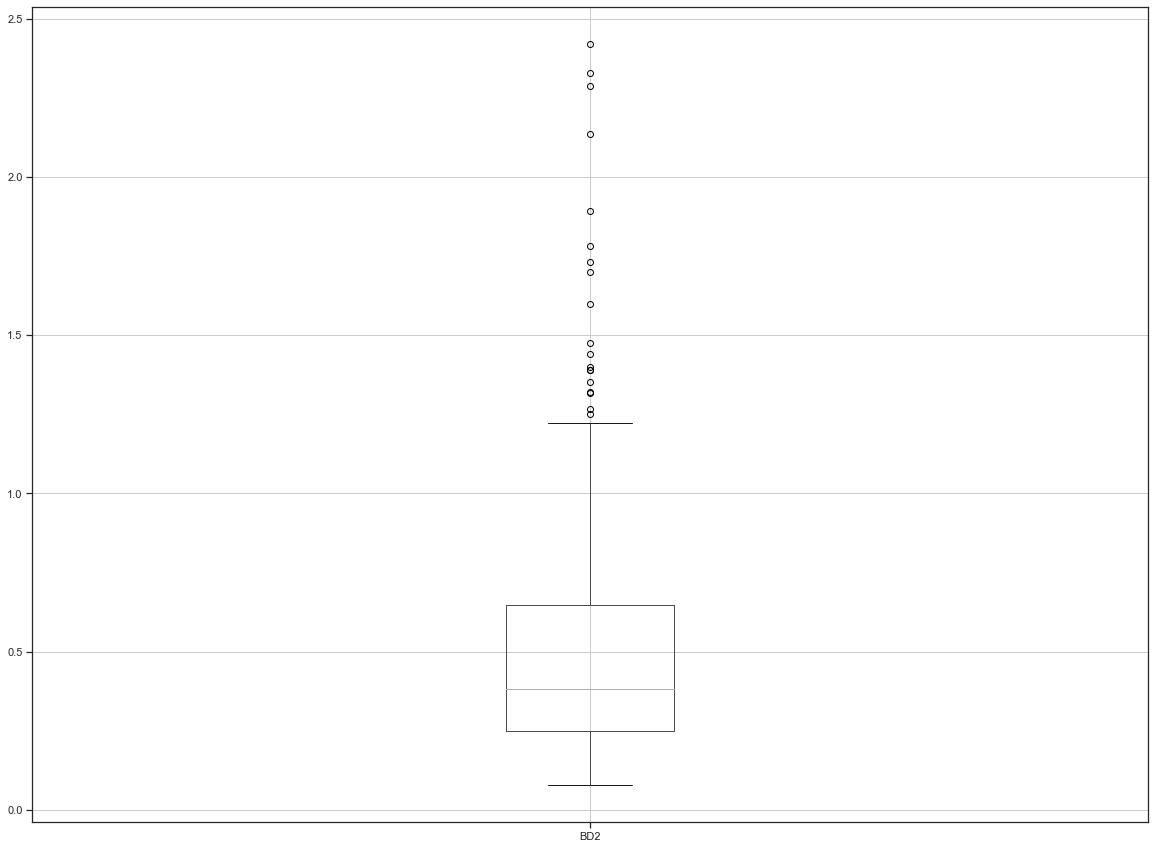

In [26]:
train.boxplot('BD2')

<a id="2.6.2"></a>
# 📸 2.6.2 Domain Knowledge:
****
**PL** (platelet rate)
> A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia. [[1](#Link1)]

**PR** (pulse rate)
> A normal resting heart rate for adults ranges from 60 to 100 beats per minute. [[2](#Link2)]

**SK**
> Normally, serum potassium (SK) level is tightly maintained between 3.5 mmol/L and 5.5 mmol/L. [[3](#Link3)]

**TS**
> - The normal range of TSH levels is 0.4 to 4.0 milli-international units per liter. If you’re already being treated for a thyroid disorder, the normal range is 0.5 to 3.0 milli-international units per liter.
> - A value above the normal range usually indicates that the thyroid is underactive. This indicates hypothyroidism. When the thyroid isn’t producing enough hormones, the pituitary gland releases more TSH to try to stimulate it.

**M11**
> - Below 18.5 – you're in the underweight range [[4](#Link4)]
> - Between 18.5 and 24.9 – you're in the healthy weight range [[4](#Link4)]
> - Between 25 and 29.9 – you're in the overweight range [[4](#Link4)]
> - Between 30 and 39.9 – you're in the obese range [[4](#Link4)]

**BD2** (cannot search???)

- However, I realised that whatever those values will be, the values which are higher or even lower 


<a id="2.6.3"></a>
# 📸 2.6.3 Dectect outliers:
****

## `PL` column:

> **Sample train Dataset**

In [27]:
train_PL_q_low = train["PL"].quantile(0.01)
train_PL_q_hi  = train["PL"].quantile(0.99)

df_filtered = train[(train["PL"] > train_PL_q_hi) | (train["PL"] < train_PL_q_low) | (train["PL"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

1.8363939899833055


,PL,PR,SK,TS,M11,BD2,Age,Sepsis
8,197,70,45,543,30.5,0.158,53,1
62,44,62,0,0,25.0,0.587,36,0
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
228,197,70,39,744,36.7,2.329,31,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
408,197,74,0,0,25.9,1.191,39,1
502,0,68,41,0,39.0,0.727,41,1
561,198,66,32,274,41.3,0.502,28,1


> **Sample test Dataset**

In [28]:
test_PL_q_low = test["PL"].quantile(0.01)
test_PL_q_hi  = test["PL"].quantile(0.99)

df_filtered = test[(test["PL"] > test_PL_q_hi) | (test["PL"] < test_PL_q_low) | (test["PL"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

2.366863905325444


,PL,PR,SK,TS,M11,BD2,Age
62,199,76,43,0,42.9,1.394,22
76,195,70,0,0,30.9,0.328,31
81,56,56,28,45,24.2,0.332,22
138,65,72,23,0,32.0,0.600,42


### ---------> OBSERVATION
****
- The outliers is insignificant, but, more people are in these special cases have sepsis. So I desire to keep them.

## `PR` column:

> **Sample train Dataset**

In [29]:
train_PR_q_low = train["PR"].quantile(0.01)
train_PR_q_hi  = train["PR"].quantile(0.99)

df_filtered = train[(train["PR"] > train_PR_q_hi) | (train["PR"] < train_PR_q_low) | (train["PR"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

5.676126878130217


,PL,PR,SK,TS,M11,BD2,Age,Sepsis
7,115,0,0,0,35.3,0.134,29,0
15,100,0,0,0,30.0,0.484,32,1
43,171,110,24,240,45.4,0.721,54,1
49,105,0,0,0,0.0,0.305,24,0
60,84,0,0,0,0.0,0.304,21,0
78,131,0,0,0,43.2,0.270,26,1
81,74,0,0,0,0.0,0.102,22,0
84,137,108,0,0,48.8,0.227,37,1
106,96,122,0,0,22.4,0.207,27,0
172,87,0,23,0,28.9,0.773,25,0


> **Sample test Dataset**

In [30]:
test_PR_q_low = test["PR"].quantile(0.01)
test_PR_q_hi  = test["PR"].quantile(0.99)

df_filtered = test[(test["PR"] > test_PR_q_hi) | (test["PR"] < test_PR_q_low) | (test["PR"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

4.733727810650888


,PL,PR,SK,TS,M11,BD2,Age
2,96,0,0,0,23.7,0.190,28
5,183,0,0,0,28.4,0.212,36
20,119,0,0,0,32.4,0.141,24
44,90,0,0,0,28.0,0.610,31
92,158,114,0,0,42.3,0.257,44
98,99,0,0,0,25.0,0.253,22
104,129,0,0,0,38.5,0.304,41
107,115,0,0,0,0.0,0.261,30


### ---------> OBSERVATION
****
- The outliers is insignificant, and it is impossible that the pulse rate can be 0 and the patients are still alive.

In [31]:
test.loc[(test["PR"] == 0), 'PR'] = test["PR"].mean()
train.loc[(train["PR"] == 0), 'PR'] = train["PR"].mean()

## `SK` column:

> **Sample train Dataset**

In [32]:
train_SK_q_low = train["SK"].quantile(0.01)
train_SK_q_hi  = train["SK"].quantile(0.99)

df_filtered = train[(train["SK"] > train_SK_q_hi) | (train["SK"] < train_SK_q_low) | (train["SK"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

30.217028380634392


,PL,PR,SK,TS,M11,BD2,Age,Sepsis
2,183,64.000000,0,0,23.3,0.672,32,1
5,116,74.000000,0,0,25.6,0.201,30,0
7,115,68.732888,0,0,35.3,0.134,29,0
9,125,96.000000,0,0,0.0,0.232,54,1
10,110,92.000000,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...
587,103,66.000000,0,0,24.3,0.249,29,0
589,73,68.732888,0,0,21.1,0.342,25,0
592,132,80.000000,0,0,34.4,0.402,44,1
596,67,76.000000,0,0,45.3,0.194,46,0


> **Sample test Dataset**

In [33]:
test_SK_q_low = test["SK"].quantile(0.01)
test_SK_q_hi  = test["SK"].quantile(0.99)

df_filtered = test[(test["SK"] > test_SK_q_hi) | (test["SK"] < test_SK_q_low) | (test["SK"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

31.360946745562128


,PL,PR,SK,TS,M11,BD2,Age
2,96,70.426036,0,0,23.7,0.190,28
5,183,70.426036,0,0,28.4,0.212,36
16,106,72.000000,0,0,25.8,0.207,27
17,117,96.000000,0,0,28.7,0.157,30
20,119,70.426036,0,0,32.4,0.141,24
23,183,94.000000,0,0,40.8,1.461,45
25,108,64.000000,0,0,30.8,0.158,21
27,125,68.000000,0,0,24.7,0.206,21
28,132,78.000000,0,0,32.4,0.393,21
29,128,80.000000,0,0,34.6,0.144,45


### ---------> OBSERVATION
****
- The outliers is considerable I need to explore it before clear it.

## `TS` column:

> **Sample train Dataset**

In [34]:
train_TS_q_low = train["TS"].quantile(0.01)
train_TS_q_hi  = train["TS"].quantile(0.99)

df_filtered = train[(train["TS"] > train_TS_q_hi) | (train["TS"] < train_TS_q_low) | (train["TS"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

49.248747913188645


,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,148,72.000000,35,0,33.6,0.627,50,1
1,85,66.000000,29,0,26.6,0.351,31,0
2,183,64.000000,0,0,23.3,0.672,32,1
5,116,74.000000,0,0,25.6,0.201,30,0
7,115,68.732888,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...
589,73,68.732888,0,0,21.1,0.342,25,0
590,111,84.000000,40,0,46.8,0.925,45,1
592,132,80.000000,0,0,34.4,0.402,44,1
596,67,76.000000,0,0,45.3,0.194,46,0


> **Sample test Dataset**

In [35]:
test_TS_q_low = test["TS"].quantile(0.01)
test_TS_q_hi  = test["TS"].quantile(0.99)

df_filtered = test[(test["TS"] > test_TS_q_hi) | (test["TS"] < test_TS_q_low) | (test["TS"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

51.4792899408284


,PL,PR,SK,TS,M11,BD2,Age
1,108,88.000000,19,0,27.1,0.400,24
2,96,70.426036,0,0,23.7,0.190,28
3,124,74.000000,36,0,27.8,0.100,30
5,183,70.426036,0,0,28.4,0.212,36
6,124,60.000000,32,0,35.8,0.514,21
...,...,...,...,...,...,...,...
162,170,74.000000,31,0,44.0,0.403,43
163,89,62.000000,0,0,22.5,0.142,33
165,122,70.000000,27,0,36.8,0.340,27
167,126,60.000000,0,0,30.1,0.349,47


### ---------> OBSERVATION
****
- The outliers is considerable I need to explore it before clear it.

## `M11` column:

> **Sample train Dataset**

In [36]:
train_M11_q_low = train["M11"].quantile(0.01)
train_M11_q_hi  = train["M11"].quantile(0.99)

df_filtered = train[(train["M11"] > train_M11_q_hi) | (train["M11"] < train_M11_q_low) | (train["M11"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

2.337228714524207


,PL,PR,SK,TS,M11,BD2,Age,Sepsis
9,125,96.000000,0,0,0.0,0.232,54,1
49,105,68.732888,0,0,0.0,0.305,24,0
60,84,68.732888,0,0,0.0,0.304,21,0
81,74,68.732888,0,0,0.0,0.102,22,0
120,162,76.000000,56,100,53.2,0.759,25,1
125,88,30.000000,42,99,55.0,0.496,26,1
145,102,75.000000,23,0,0.0,0.572,21,0
177,129,110.000000,46,130,67.1,0.319,26,1
303,115,98.000000,0,0,52.9,0.209,28,1
371,118,64.000000,23,89,0.0,1.731,21,0


> **Sample test Dataset**

In [37]:
test_M11_q_low = test["M11"].quantile(0.01)
test_M11_q_hi  = test["M11"].quantile(0.99)

df_filtered = test[(test["M11"] > test_M11_q_hi) | (test["M11"] < test_M11_q_low) | (test["M11"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

2.366863905325444


,PL,PR,SK,TS,M11,BD2,Age
74,123,100.000000,35,240,57.3,0.880,22
82,162,76.000000,36,0,49.6,0.364,26
85,136,82.000000,0,0,0.0,0.640,69
107,115,70.426036,0,0,0.0,0.261,30


### ---------> OBSERVATION
****
- The outliers is considerable I need to explore it before clear it.
- For the `0` values I want to replace it since it is impossible for a normal people have Body mass index is equal to 0.

In [38]:
test.loc[(test["M11"] == 0), 'PR'] = test["M11"].mean()
train.loc[(train["M11"] == 0), 'PR'] = train["M11"].mean()

## `BD2` column:

> **Sample train Dataset**

In [39]:
train_BD2_q_low = train["BD2"].quantile(0.01)
train_BD2_q_hi  = train["BD2"].quantile(0.99)

df_filtered = train[(train["BD2"] > train_BD2_q_hi) | (train["BD2"] < train_BD2_q_low) | (train["BD2"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

2.003338898163606


,PL,PR,SK,TS,M11,BD2,Age,Sepsis
4,137,40.0,35,168,43.1,2.288,33,1
45,180,66.0,39,0,42.0,1.893,25,1
58,146,82.0,0,0,40.5,1.781,44,0
135,125,60.0,20,140,33.8,0.088,31,0
149,90,70.0,17,0,27.3,0.085,22,0
180,87,80.0,0,0,23.2,0.084,32,0
228,197,70.0,39,744,36.7,2.329,31,0
268,102,52.0,0,0,25.1,0.078,21,0
370,173,82.0,48,465,38.4,2.137,25,1
445,180,78.0,63,14,59.4,2.420,25,1


> **Sample test Dataset**

In [40]:
test_BD2_q_low = test["BD2"].quantile(0.01)
test_BD2_q_hi  = test["BD2"].quantile(0.99)

df_filtered = test[(test["BD2"] > test_BD2_q_hi) | (test["BD2"] < test_BD2_q_low) | (test["BD2"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

2.366863905325444


,PL,PR,SK,TS,M11,BD2,Age
3,124,74.0,36,0,27.8,0.100,30
22,92,76.0,20,0,24.2,1.698,28
23,183,94.0,0,0,40.8,1.461,45
34,128,82.0,17,183,27.5,0.115,22


### ---------> OBSERVATION
****
- The outliers is considerable I need to explore it before clear it.

## Check outliers
***
I want to query all the numberical columns to check if those medical values which is considered to be the outliers have the probability to have sepsis?

In [41]:
likely_sepsis = train[(train["PL"] > train_PL_q_hi) | (train["PL"] < train_PL_q_low) |
                      (train["PR"] > train_PR_q_hi) | (train["PR"] < train_PR_q_low) |
                      (train["SK"] > train_SK_q_hi) | (train["SK"] < train_SK_q_low) |
                      (train["TS"] > train_TS_q_hi) | (train["TS"] < train_TS_q_low) |
                      (train["M11"] > train_M11_q_hi) | (train["M11"] < train_M11_q_low) |
                      (train["BD2"] > train_BD2_q_hi) | (train["BD2"] < train_BD2_q_low)]

rslt_df = likely_sepsis[(likely_sepsis['Sepsis'] == 1)]

print(len(rslt_df)/ len(likely_sepsis) * 100)

51.28205128205128


### ---------> OBSERVATION
****
- As we can see, it is more than a half of the people having the abnormal statistic tend to have sepsis. Since then, I do not want to drop these outliers. Moreover, sepsis is a kind of illness, and having those abnormal statistic means likely to cause illness.

<a id="2.7"></a>
# 📂 2.7 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later in dash.

In [42]:
train.to_csv("Data/train_cleaned.csv", encoding='utf-8')
test.to_csv("Data/test_cleaned.csv", encoding='utf-8')

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>

## Function for box plot visualization

In [43]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

<a id="3.1"></a>
# 3.1 Overall look on target variable

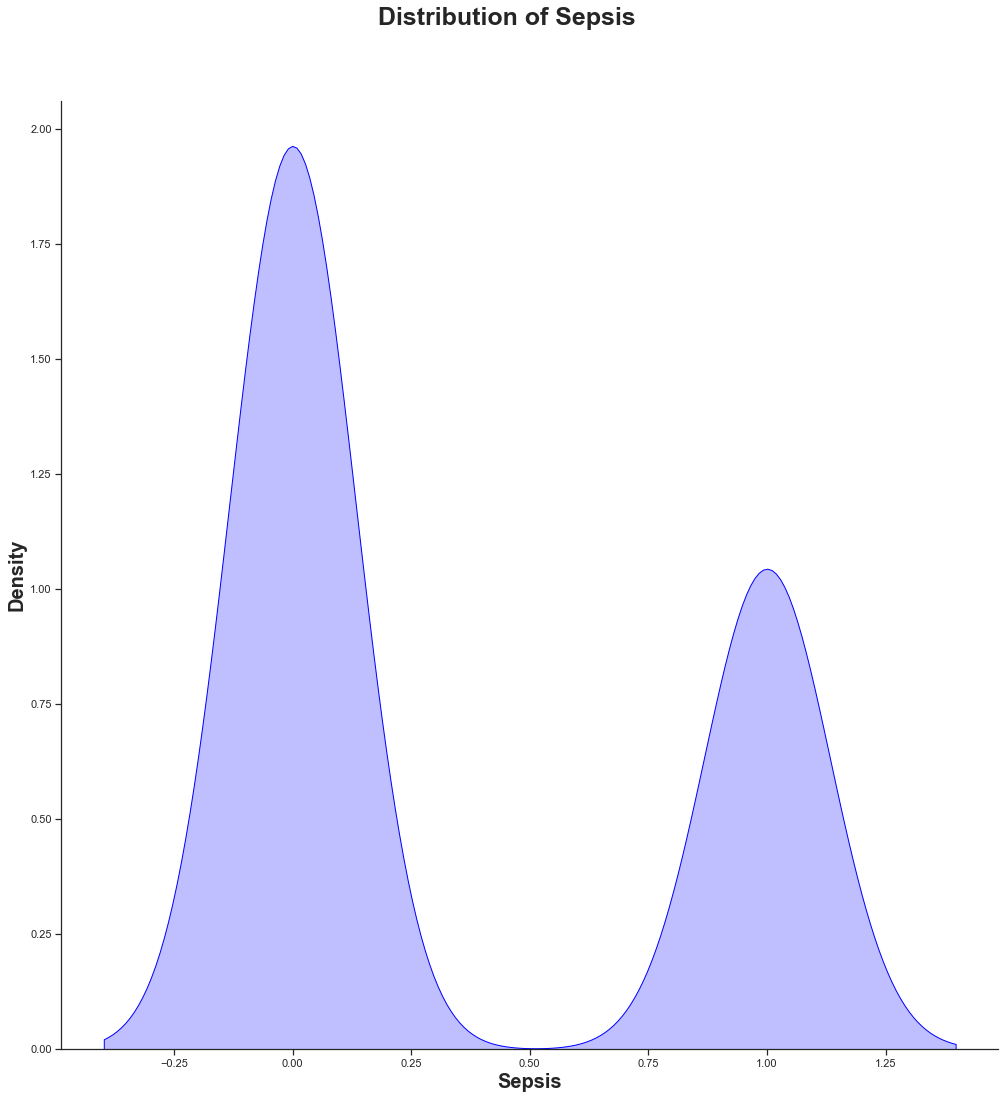

In [44]:
# sns.displot(train, x="Survived", hue="Pclass", kind="kde", fill=True)
plot = sns.displot(train, x="Sepsis", kind="kde", fill=True, color='blue', height= 14)

plot.fig.suptitle("Distribution of Sepsis", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Sepsis", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Density", fontsize = 20, fontweight = 'bold')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>It is a <span style="color:#122ecc;">bionormal distribution</span></li> 
    <li>Suprisingly, <span style="color:#122ecc;">more</span> people <span style="color:#122ecc;">don't have Sepsis</span>.</li>
</ul>
</div>

<a id="3.2"></a>
# 3.2 Frequency of each corresponiding Target variable type
****


<a id="3.2.1"></a>
## 3.2.1 How old are they?
****

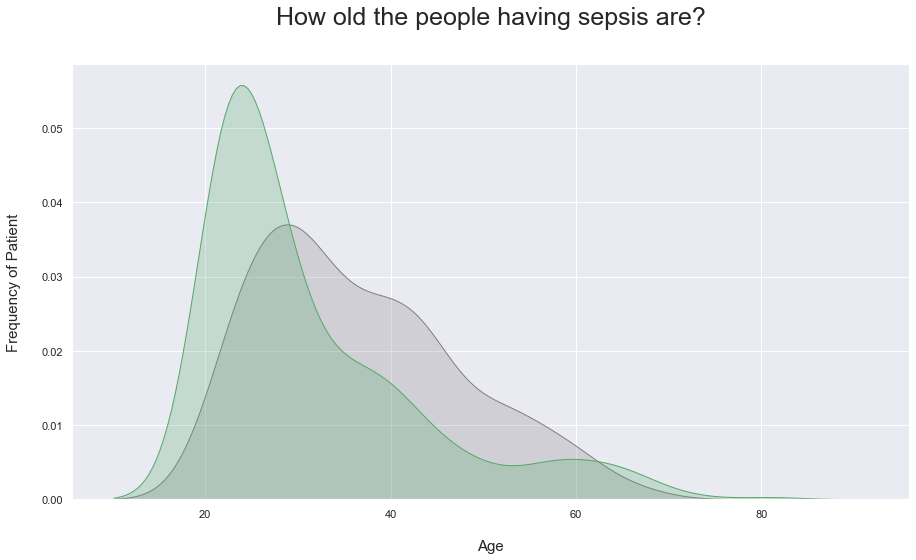

In [45]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
sns.set(style="darkgrid")
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 1),'Age'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 0),'Age'] , color='g',shade=True)
plt.title('How old the people having sepsis are?', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Patient", fontsize = 15, labelpad = 20)
plt.xlabel("Age", fontsize = 15, labelpad = 20);


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>In this chart, the green is for the people not having Sepsis, and the people who have Sepsis is the gray one.</li>
    <li>As expected, the <span style="color:#122ecc;">older people</span> tend to have higher chance to have Sepsis than younger people. </li> 
    <li>In the <span style="color:#122ecc;">the 30s or older</span>, people have higher probability to have Sepsis</li>
</ul>
</div>

<a id="3.2.2"></a>
## 3.2.2 How much they weight?
****

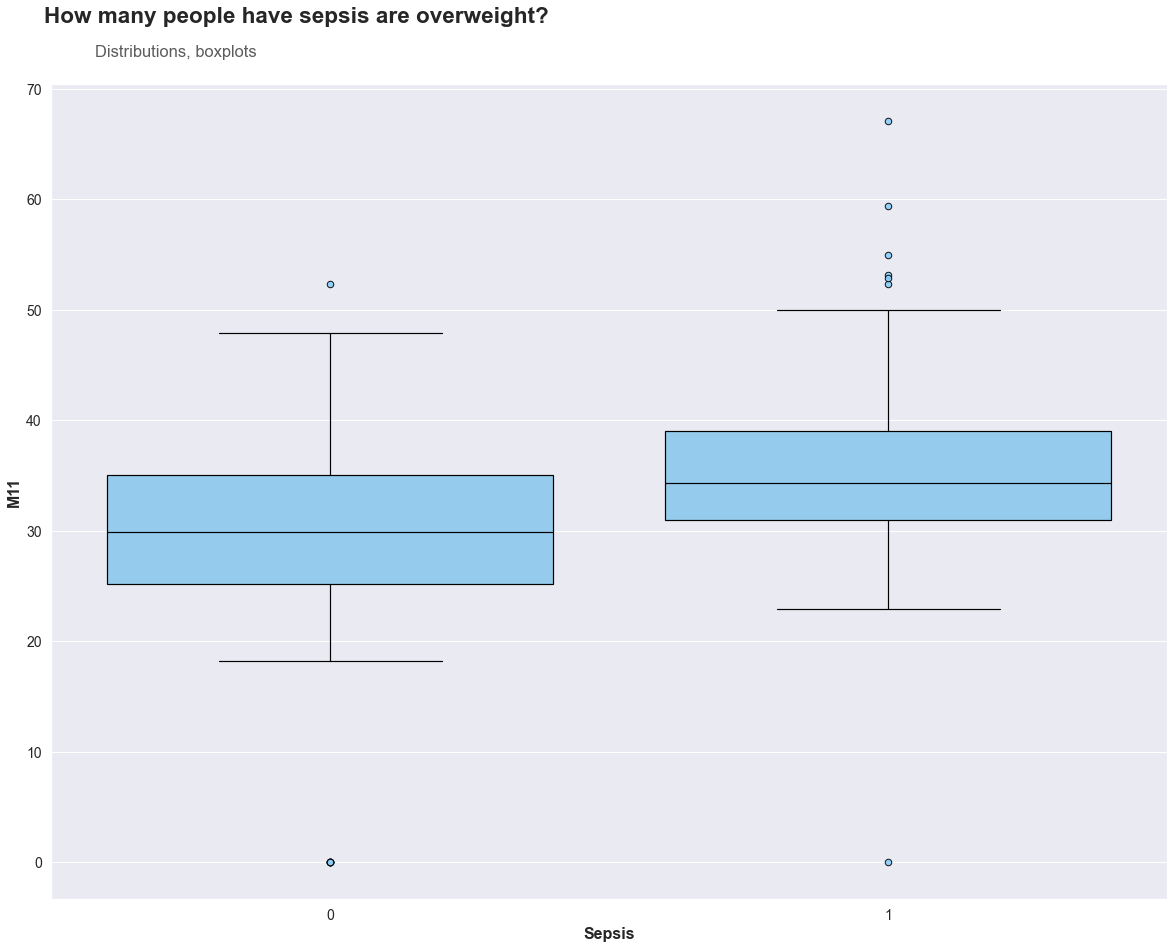

In [46]:
plot_box(train, x = "Sepsis", y = "M11", xlabel = 'Sepsis', ylabel = "M11", title = "How many people have sepsis are overweight?",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> Body Mass Index tend to have higher chance to have Sepsis. </li>
    <li>The average of body mass index that people having Sepsis is <span style="color:#122ecc;">over 35kg/m^2.</span> </li> 
</ul>
</div>

<a id="3.2.3"></a>
## 3.2.3 How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?
****

C:\Users\William\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\William\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


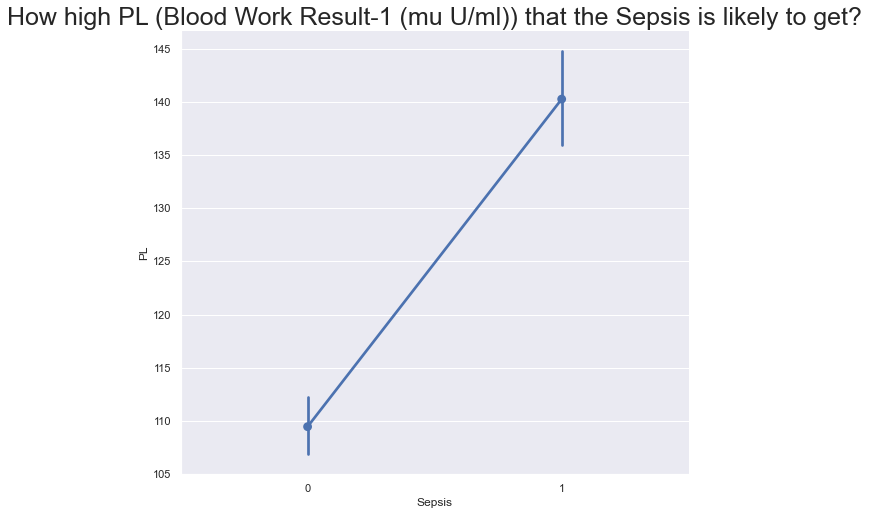

In [47]:
sns.factorplot(x =  "Sepsis", y = "PL", data = train,kind = "point",size = 8)
plt.title('How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?', fontsize = 25)
plt.subplots_adjust(top=0.85)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> PL (Blood Work Result-1 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The average of PL (Blood Work Result-1 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 140</span> while people not have Sepsis have the average PL is around 100</li> 
</ul>
</div>

<a id="3.2.4"></a>
## 3.2.4 How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?
****

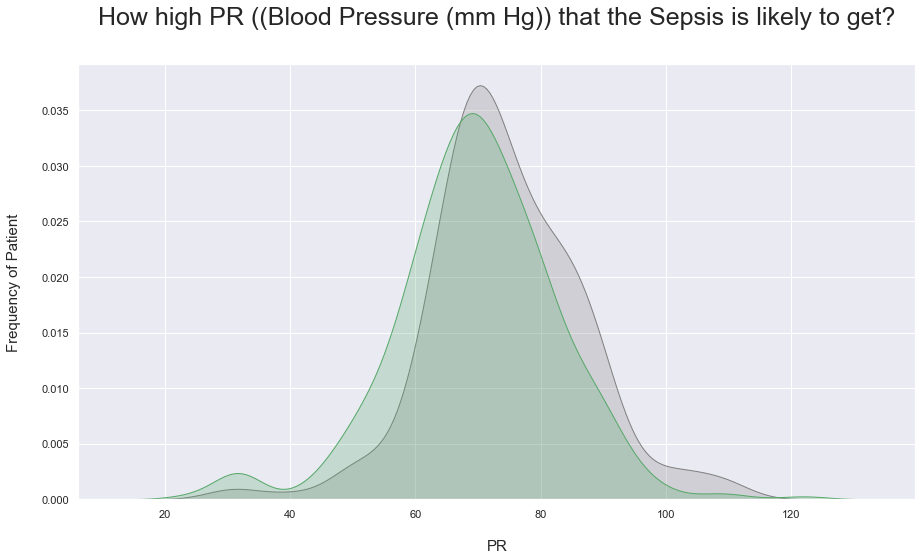

In [48]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
sns.set(style="darkgrid")
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 1),'PR'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 0),'PR'] , color='g',shade=True)
plt.title('How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Patient", fontsize = 15, labelpad = 20)
plt.xlabel("PR", fontsize = 15, labelpad = 20);


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> PR ((Blood Pressure (mm Hg) tend to have higher chance to have Sepsis. </li>
    <li>The level of PR ((Blood Pressure (mm Hg) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 80</span></li> 
</ul>
</div>

<a id="3.2.5"></a>
## 3.2.5 How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?
****

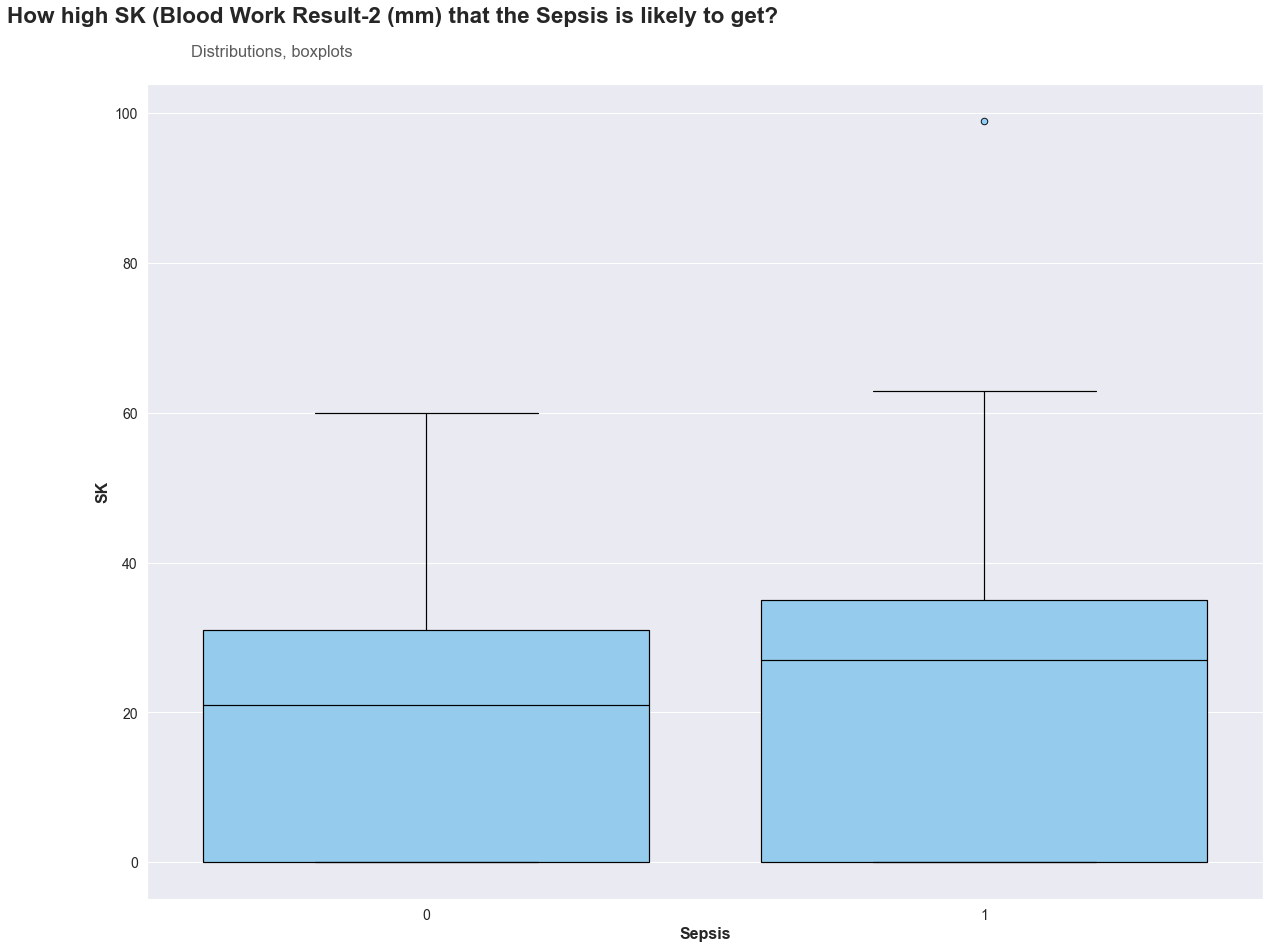

In [49]:
plot_box(train, x = "Sepsis", y = "SK", xlabel = 'Sepsis', ylabel = "SK", title = "How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> SK (Blood Work Result-2 (mm) tend to have higher chance to have Sepsis. </li>
    <li>The average of SK (Blood Work Result-2 (mm)) that people having Sepsis is <span style="color:#122ecc;">higher than 30</span> while people not have Sepsis have the average SK is around 20</li> 
</ul>
</div>

<a id="3.2.6"></a>
## 3.2.6 How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?
****

C:\Users\William\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\William\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


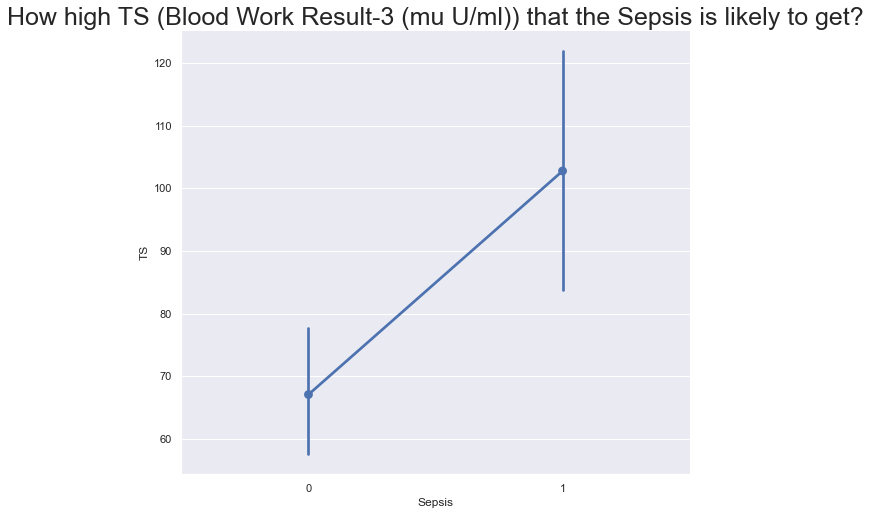

In [50]:
sns.factorplot(x =  "Sepsis", y = "TS", data = train,kind = "point",size = 8)
plt.title('How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?', fontsize = 25)
plt.subplots_adjust(top=0.85)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> TS (Blood Work Result-3 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The average of TS (Blood Work Result-3 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 110</span> while people not have Sepsis have the average TS is lower than 70</li> 
</ul>
</div>

<a id="3.2.7"></a>
## 3.2.7 How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?
****

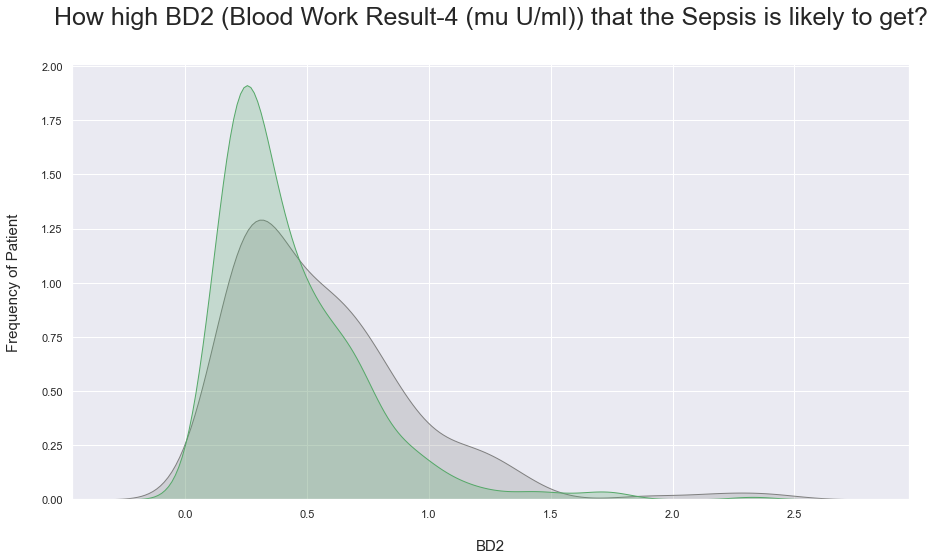

In [51]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
sns.set(style="darkgrid")
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 1),'BD2'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['Sepsis'] == 0),'BD2'] , color='g',shade=True)
plt.title('How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Patient", fontsize = 15, labelpad = 20)
plt.xlabel("BD2", fontsize = 15, labelpad = 20);


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>As expected, people having <span style="color:#122ecc;">higher</span> BD2 (Blood Work Result-4 (mu U/ml)) tend to have higher chance to have Sepsis. </li>
    <li>The level of BD2 (Blood Work Result-4 (mu U/ml)) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 0.5</span></li> 
</ul>
</div>

<a id="3.2.8"></a>
## 3.2.8 Scatter matrix
****

array([[<AxesSubplot:xlabel='PL', ylabel='PL'>,
        <AxesSubplot:xlabel='PR', ylabel='PL'>,
        <AxesSubplot:xlabel='SK', ylabel='PL'>,
        <AxesSubplot:xlabel='TS', ylabel='PL'>,
        <AxesSubplot:xlabel='M11', ylabel='PL'>,
        <AxesSubplot:xlabel='BD2', ylabel='PL'>,
        <AxesSubplot:xlabel='Age', ylabel='PL'>,
        <AxesSubplot:xlabel='Sepsis', ylabel='PL'>],
       [<AxesSubplot:xlabel='PL', ylabel='PR'>,
        <AxesSubplot:xlabel='PR', ylabel='PR'>,
        <AxesSubplot:xlabel='SK', ylabel='PR'>,
        <AxesSubplot:xlabel='TS', ylabel='PR'>,
        <AxesSubplot:xlabel='M11', ylabel='PR'>,
        <AxesSubplot:xlabel='BD2', ylabel='PR'>,
        <AxesSubplot:xlabel='Age', ylabel='PR'>,
        <AxesSubplot:xlabel='Sepsis', ylabel='PR'>],
       [<AxesSubplot:xlabel='PL', ylabel='SK'>,
        <AxesSubplot:xlabel='PR', ylabel='SK'>,
        <AxesSubplot:xlabel='SK', ylabel='SK'>,
        <AxesSubplot:xlabel='TS', ylabel='SK'>,
        <AxesSubplot:xla

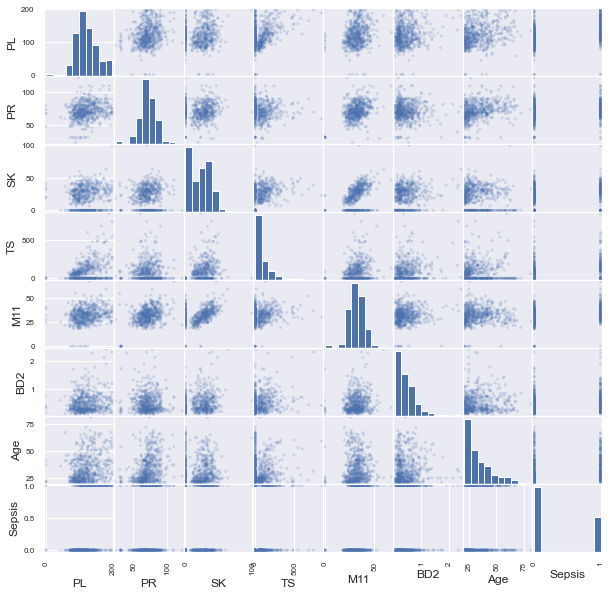

In [52]:
scatter_matrix(train,alpha=0.2,figsize=(10,10),diagonal='hist')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Only <span style="color:#122ecc;">PL, PR and M1</span> features have nearly normal distribution</li>
    <li>The feature <span style="color:#122ecc;">SK, TS, BD2 and Age</span> have skewed right distribution</li>
</ul>
</div>

<a id="3.3"></a>
# 3.3 Statistical Test for Correlation
****
> **Null Hypothesis($H_0$):**  people having sepsis have greater or equal medical statistic to people not having sepsis.  
>  **Alternative Hypothesis($H_A$):** people having sepsis have lower medical statistic to people not having sepsis.  

In [53]:
# male_mean = train[train['Sepsis'] == 1]

# female_mean = train[train['Sepsis'] == 0]
# print ("Male LengthOfStay mean: " + str(male_mean))
# print ("female LengthOfStay mean: " + str(female_mean))

# print ("The mean difference between male and female LengthOfStay: " + str(male_mean - female_mean))

<a id="3.4"></a>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">3.4 Summary</li>
</ul>
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
    <br>
    
*******
    
<li>1. Suprisingly, <span style="color:#122ecc;">more</span> people <span style="color:#122ecc;">don't have Sepsis</span>.</li>
<br>
<li>2. In the <span style="color:#122ecc;">the 30s or older</span>, people have higher probability to have Sepsis</li>
<br>
<li>3. The higher the body mass index is the higher chance that pantient can get Sepsis. The average of body mass index that people having Sepsis is <span style="color:#122ecc;">over 35kg/m^2.</span> </li>
<br>
<li>4. The higher the PL is the higher chance that pantient can get Sepsis. The average of PL (Blood Work Result-1 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 140</span> while people not have Sepsis have the average PL is around 100</li>
<br>
<li>5. The higher the PR is the higher chance that pantient can get Sepsis. The level of PR ((Blood Pressure (mm Hg) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 80</span> </li>
<br>
<li>6. The higher the SK is the higher chance that pantient can get Sepsis. The average of SK (Blood Work Result-2 (mm)) that people having Sepsis is <span style="color:#122ecc;">higher than 30</span> while people not have Sepsis have the average SK is around 20 </li>
<br>
<li>7. The higher the TS is the higher chance that pantient can get Sepsis. The average of TS (Blood Work Result-3 (mu U/ml)) that people having Sepsis is <span style="color:#122ecc;">higher than 110</span> while people not have Sepsis have the average TS is lower than 70 </li>
<br>
<li>8. The higher the TS is the higher chance that pantient can get Sepsis. The level of BD2 (Blood Work Result-4 (mu U/ml)) that people having Sepsis likely to have is <span style="color:#122ecc;">higher than 0.5 </span> </li>
    
</ul>

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🛠 4. Feature Engineering</strong></h1>

<a id="4.1"></a>
# 4.1 Splitting the training data
***

In [54]:
# separating our independent and dependent variable
X = train.drop(['Sepsis'], axis = 1)
#Target variable in y
y = train["Sepsis"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .30, random_state=42)

print("Length of X_train: " + str(len(X_train)))
print("Length of X_test: " + str(len(X_test)))

Length of X_train: 419
Length of X_test: 180


<a id="4.2"></a>
# 4.2 Feature Scaling
***

In [56]:
train.sample(5)

,PL,PR,SK,TS,M11,BD2,Age,Sepsis
38,90,68.0,42,0,38.2,0.503,27,1
33,92,92.0,0,0,19.9,0.188,28,0
197,107,62.0,13,48,22.9,0.678,23,1
71,139,64.0,35,140,28.6,0.411,26,0
492,99,68.0,38,0,32.8,0.145,33,0


<h1><font color="$5831bc" face="Comic Sans MS">Before Scaling</font></h1>

In [57]:
headers = X_train.columns 

X_train.head()

,PL,PR,SK,TS,M11,BD2,Age
108,83,58.0,31,18,34.3,0.336,25
272,122,78.0,0,0,23.0,0.254,40
598,173,74.0,0,0,36.8,0.088,38
479,132,86.0,31,0,28.0,0.419,63
436,140,85.0,33,0,37.4,0.244,41


### ------------> OBSERVATION
***
In this dataset, I realise that the scale of the dataset is quite large so I want to scale it. 
There are multiple ways to do feature scaling. [[5](#Link5)]
<ul>
    <li><b>MinMaxScaler</b> : it use min max to scale, if there is any negative values in the data, it scale them back between 0, and 1.</li> 
    <li><b>StandardScaler</b>: it makes mean = 0 and scales the data to unit variance.</li>
    <li><b>RobustScaler</b>: nearly the same with StandardScaler but, it also use the median, and nterquertile range in order to remove outliers </li>
 </ul>

<h1><font color="$5831bc" face="Comic Sans MS">Scaling</font></h1>

***

I desire to use standardization scalers for this since I want to apply Logistic regression algorithm for my model, and Logistic regression often generates more reliable predictions with standardization scalers

In [58]:
# Feature Scaling
## We will be using standardscaler to transform

st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

<h1><font color="#5831bc" face="Comic Sans MS">After Scaling</font></h1>

In [59]:
pd.DataFrame(X_train, columns=headers).head()

,PL,PR,SK,TS,M11,BD2,Age
0,-1.172166,-1.177149,0.612149,-0.517980,0.298348,-0.442414,-0.703795
1,0.060181,0.525121,-1.336675,-0.675245,-1.268410,-0.689970,0.533852
2,1.671712,0.184667,-1.336675,-0.675245,0.644976,-1.191120,0.368833
3,0.376167,1.206030,0.612149,-0.675245,-0.575154,-0.191838,2.431579
4,0.628956,1.120916,0.737879,-0.675245,0.728167,-0.720160,0.616362


<a id="4.3"></a>
# 4.3 Class Imbalancing
***
I want to normalise the target variable for blabla

In [60]:
train['Sepsis'].value_counts()

0    391
1    208
Name: Sepsis, dtype: int64

In [61]:
train['Sepsis'].value_counts(normalize=True, dropna=False)

0    0.652755
1    0.347245
Name: Sepsis, dtype: float64

<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🤖 5. Model training</strong></h1>

*****

There are five machine learning model that I have learned so far which are Linear Regression, Lasso polynomial regression, Ridge Regression, Logistic Regression, and Decision Tree. From that, I chose Linear Regression, Logistic Regression and Decision Tree for my assignment 1. The reason will be demonstrated.

## Major Keyword for this problem:
> - Linear, Binary Classification

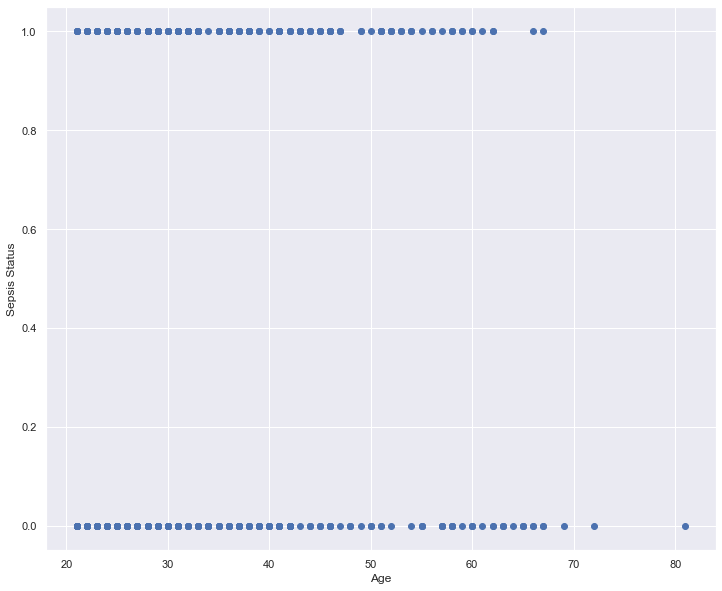

In [62]:
plt.subplots(figsize = (12,10))
plt.scatter(train.Age, train.Sepsis);
plt.xlabel("Age")
plt.ylabel('Sepsis Status');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>It is <span style="color:#122ecc;">Bernoulli probability distribution </span></li>
</ul>
</div>

<a id="5.1"></a>
# 5.1 Logistic Regression:
****

## ***Logistic regression***: 

> - It is a process for training the classification model having the discrete outcomes. 
> - It assumes there are linear relationships between the target variable (y) with the input features (x), hence, that y values can be determined by a linear combination of all the input features.
> - It has the sigmoid function or the "S" curve to fit the data point. 


## $$ h = \theta_0 + \theta_1 x + \theta_2x + ... + \theta_nx \\ $$

This is the equation for a simple linear regression.
here,
* h = Hypothesis ℎ, with respect to weights $\theta$. 
* $\theta$ = weight of variable
* $x$ = Features/attributes. 

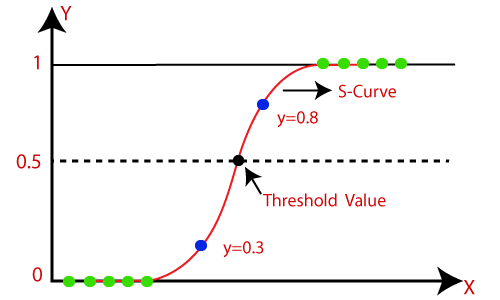

## ***Why I chose Logistic regression***: 

> - It does not need to assume there is any linearly seperable.
> - It works best for binary classification.
> - It works best for a linear problem.


<a id="5.1.1"></a>
## 5.1.1 Train Model

In [63]:
## Initialise the Logistic Regression
logreg = LogisticRegression(solver='liblinear', # I use 'liblinear' for solver since this is just a simple prob.
                            penalty= 'l2' # I use 'l2' since it does not remove outliers.
                            )


## Fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_pred = logreg.predict(X_test)

<a id="5.1.2"></a>
## 5.1.2 Model Evaluation
****
There are many evaluation techniques for classification problem. There are:
* Confusion Matrix. 
* ROC & AUC Curve

## Confusion Matrix:
****
- It is used for calculating the percentage of data that is correctly classified, the class having the highest correct classified prediction, or misclassifies class. It cludes:

> - **True Positive(TP)**
> - **True Negative(TN)**
> - **False Positive(FP)**
> - **False Negative(FN)**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Sepsis", "Predicted Sepsis"],\
            index=["Not-Sepsis","Sepsis"] )

,Predicted Not-Sepsis,Predicted Sepsis
Not-Sepsis,100,14
Sepsis,29,37


[[100  14]
 [ 29  37]]


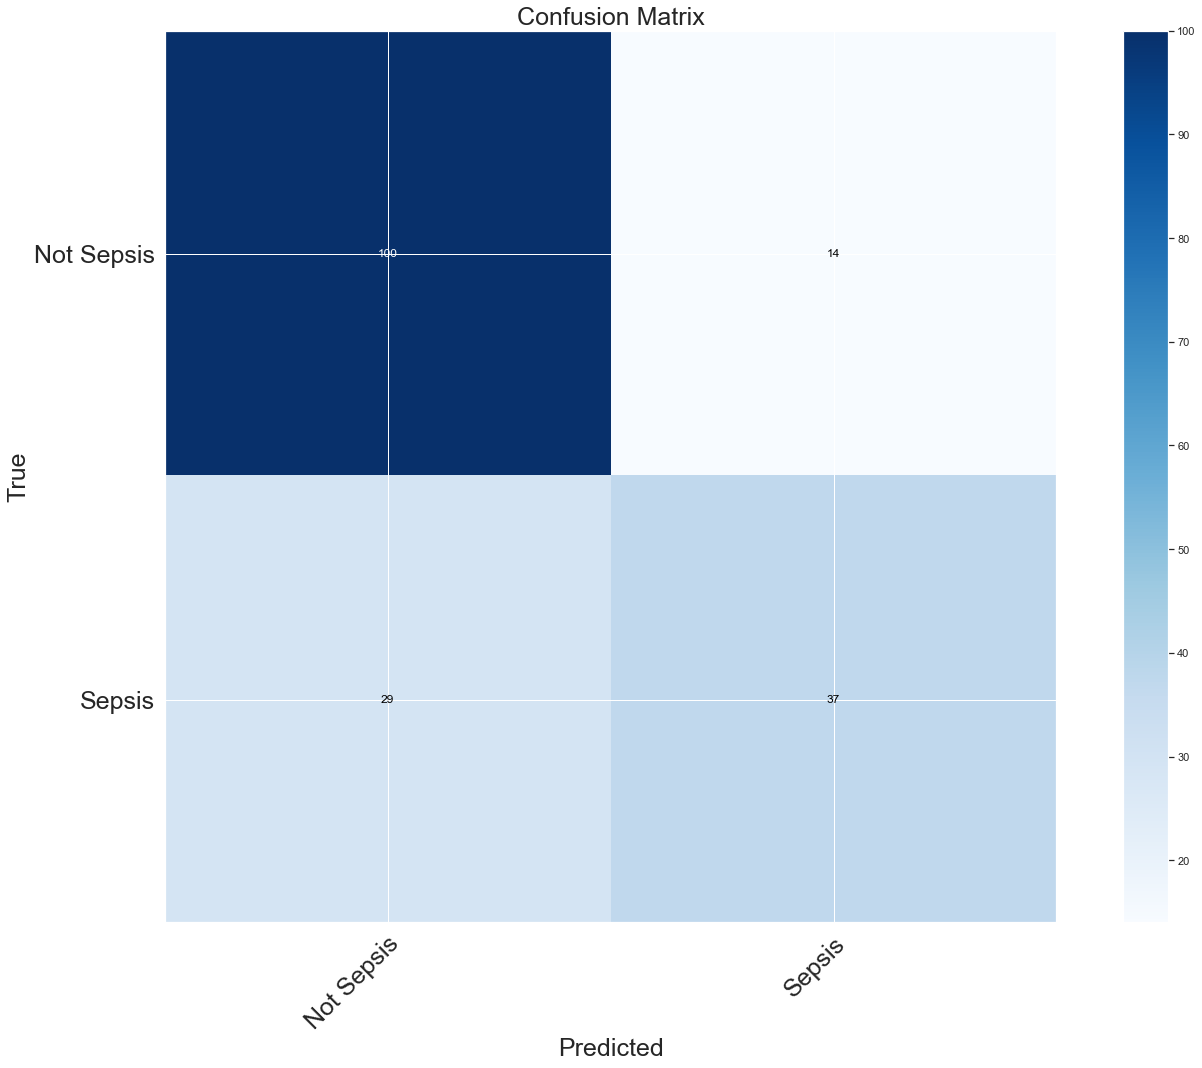

In [65]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title)
    ax.set_title('Confusion Matrix',fontsize = 25); 
    plt.xlabel('Predicted',fontsize = 25)
    plt.ylabel('True',fontsize = 25)
    ax.xaxis.set_ticklabels(['Not Sepsis','Sepsis'],fontsize = 25); 
    ax.yaxis.set_ticklabels(['Not Sepsis','Sepsis'],fontsize = 25);


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['Not Sepsis','Sepsis'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

### ------------> OBSERVATION
****
- From that confusion matrix I have:

> - ***True Positive(TP)***: 37
> - ***True Negative(TN)***: 29
> - ***False Positive(FP)***: 14
> - ***False Negative(FN)***: 100

## Accuracy:
****
> - It measures the ratio between the number of corrected prediction points and the total number of the data point in the test set.
>> (TP + TN)/total

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7611111111111111

## Precision:
****
> - It calculates the frequency that model predicts yes. 
>> TP/(TP+FP)

In [67]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7254901960784313

## Recall:
****
> - It calculate the frequency that model predicts yes(Sepsis)w when it's actually yes(Sepsis)

In [68]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5606060606060606

## Classification report:
****

In [69]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       114
           1       0.73      0.56      0.63        66

    accuracy                           0.76       180
   macro avg       0.75      0.72      0.73       180
weighted avg       0.76      0.76      0.75       180



## AUC & ROC Curve

0.7893407761828816


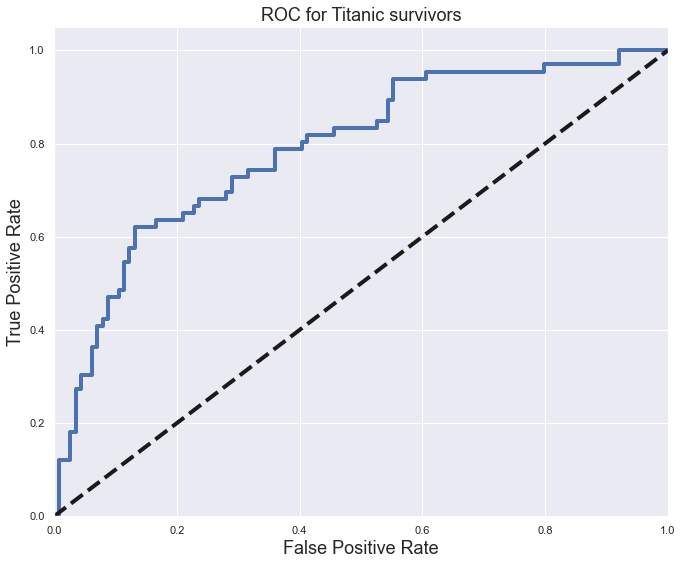

In [70]:
from sklearn.metrics import roc_curve, auc

y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

## Using Cross-validation:
Pros: 
* Helps reduce variance. 
* Expends models predictability.

In [71]:
sc = st_scale

In [72]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.74 0.73 0.78 0.81 0.8  0.78 0.78 0.82 0.75 0.79]
Mean Cross-Validation accuracy score: 0.77867


<a id="5.1.3"></a>
## 5.1.3 Hypertuning
****

In [73]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = np.logspace(-4, 4, 50)
model = LogisticRegression()
random_state = [i for i in (0, 42)]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.770800 using {'C': 0.08685113737513521, 'penalty': 'l2', 'solver': 'liblinear'}
0.652768 (0.005679) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.652768 (0.005679) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.746864 (0.059492) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.652768 (0.005679) with: {'C': 0.00014563484775012445, 'penalty': 'l2', 'solver': 'newton-cg'}
0.652768 (0.005679) with: {'C': 0.00014563484775012445, 'penalty': 'l2', 'solver': 'lbfgs'}
0.747420 (0.058656) with: {'C': 0.00014563484775012445, 'penalty': 'l2', 'solver': 'liblinear'}
0.652768 (0.005679) with: {'C': 0.00021209508879201905, 'penalty': 'l2', 'solver': 'newton-cg'}
0.652768 (0.005679) with: {'C': 0.00021209508879201905, 'penalty': 'l2', 'solver': 'lbfgs'}
0.747420 (0.058656) with: {'C': 0.00021209508879201905, 'penalty': 'l2', 'solver': 'liblinear'}
0.652768 (0.005679) with: {'C': 0.00030888435964774815, 'penalty': 'l2', 'solver': 'newton-cg'}
0.652768 (0.

In [74]:
## Getting the best of score. 
print (grid_search.best_score_)
## Getting the best of parameter. 
print (grid_search.best_params_)
## Getting the best of estimator. 
print(grid_search.best_estimator_)

0.7708003766478341
{'C': 0.08685113737513521, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.08685113737513521, solver='liblinear')


### ------------> OBSERVATION
****
From this result, I can see that my parameter for penalty and solver is right, and with the c = 0.1 can generate the highest score with 0.77

<a id="5.2"></a>
# 5.2 Decision Tree Classifier:
****

## ***Decision Tree Classifier***: 

> - It is a supervised learning strategy that can be used for both classificaton and regression. 
> - It has the branch to represent a decision rule, and the outcomes are presented in each leafnode.
> - It uses the Attribute Selection Measures(ASM) to split the leafnode.
> - Some of the most popular selection measurement are Information Gain, Gain Ratio, and Gini Index.

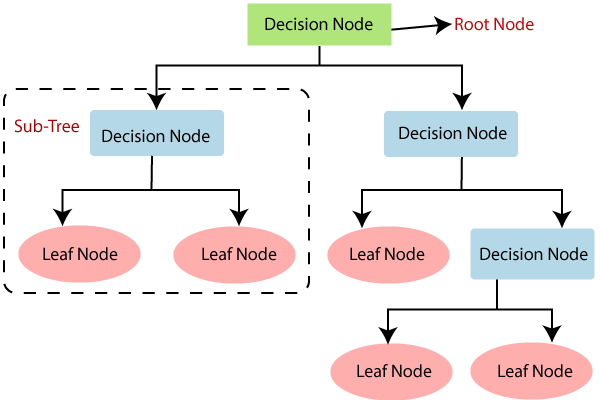

## ***Why I chose  Decision Tree Classifier***: 

> - It works best with classification.
> - It is easy to interpret and visualize.
> - I do not need to normalise the data.
> - It has no assumptions about distribution because of the non-parametric nature of the algorithm.

<a id="5.2.1"></a>
## 5.2.1 Train Model:
****

In [75]:
# Initialise the model
decision_tree = DecisionTreeClassifier(criterion="entropy", #I just have 2 output so I want to use binary tree
                                       splitter='random', # I choose "best" since I want to choose the best split
                                       max_depth=6 # I choose 6 since there are 7 features, so it matches 6 child node
                                      )

# Fit the model with train set
decision_tree = decision_tree.fit(X_train,y_train)

# Use the test set to predict
y_pred = decision_tree.predict(X_test)

<a id="5.2.2"></a>
## 5.2.2 Model Evaluation:
****

## Confusion Matrix:
****

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Sepsis", "Predicted Sepsis"],\
            index=["Not-Sepsis","Sepsis"] )

,Predicted Not-Sepsis,Predicted Sepsis
Not-Sepsis,93,21
Sepsis,30,36


[[93 21]
 [30 36]]


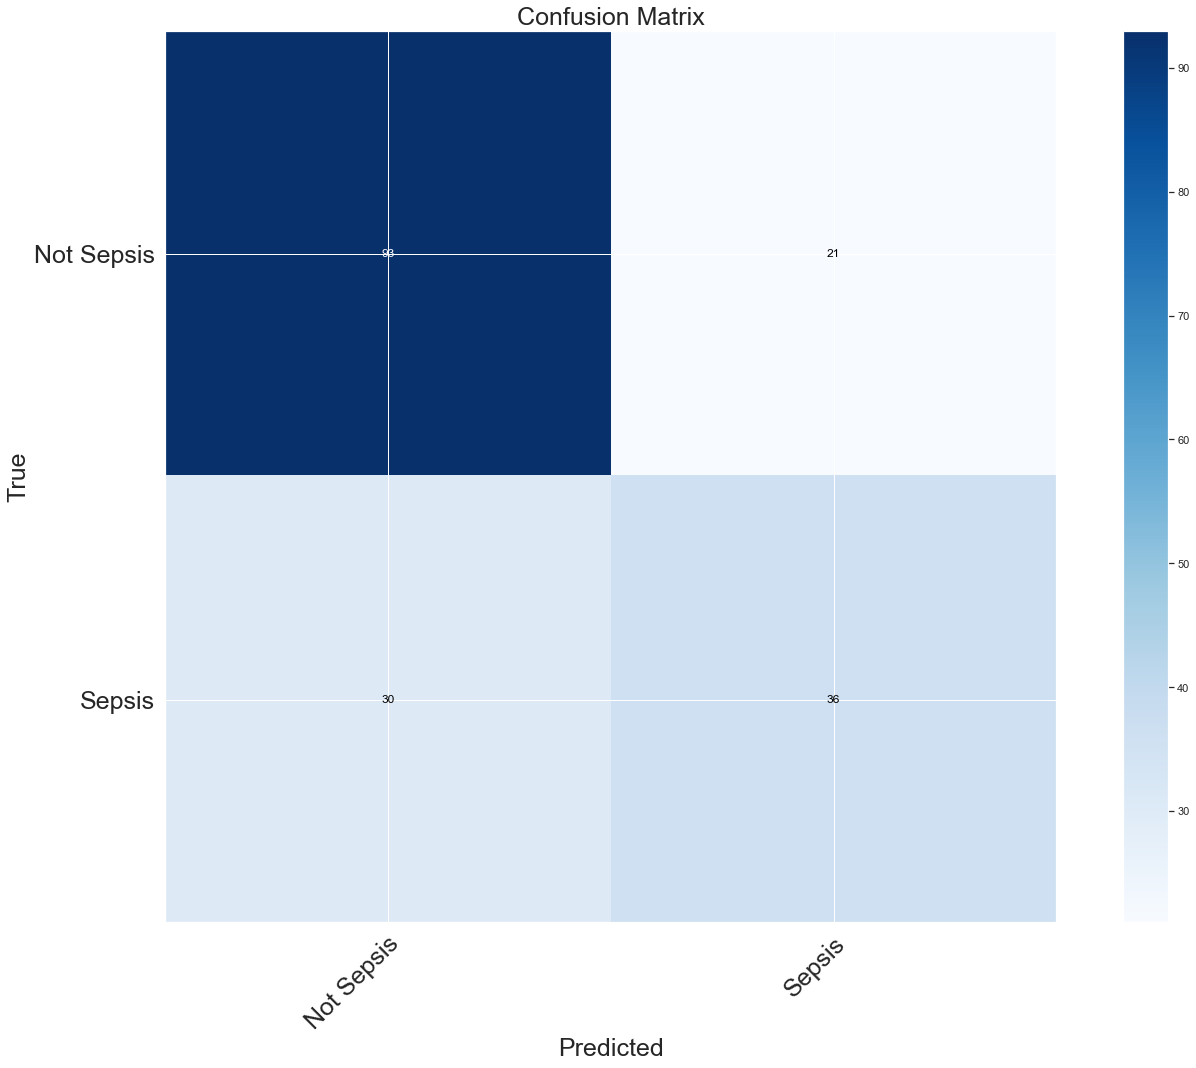

In [77]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title)
    ax.set_title('Confusion Matrix',fontsize = 25); 
    plt.xlabel('Predicted',fontsize = 25)
    plt.ylabel('True',fontsize = 25)
    ax.xaxis.set_ticklabels(['Not Sepsis','Sepsis'],fontsize = 25); 
    ax.yaxis.set_ticklabels(['Not Sepsis','Sepsis'],fontsize = 25);


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['Not Sepsis','Sepsis'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

## Accuracy:
****

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7166666666666667

## Precision:
****

In [79]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.631578947368421

## Recall:
****

In [80]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5454545454545454

## Classification report:
****

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78       114
           1       0.63      0.55      0.59        66

    accuracy                           0.72       180
   macro avg       0.69      0.68      0.69       180
weighted avg       0.71      0.72      0.71       180



<a id="5.2.3"></a>
## 5.2.3 Hypertuning - Pruning:
****

In [82]:
criterion = ['gini', 'entropy']
max_depth = range(1,7)
splitter = ['best', 'random']
ccp_alpha = [0.030, 0.0025, 0]

max_leaf_nodes = range(2,10)
model = DecisionTreeClassifier()

# define grid search
grid = dict(criterion=criterion, max_depth=max_depth, splitter=splitter,  max_leaf_nodes=max_leaf_nodes,
            ccp_alpha = ccp_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.750226 using {'ccp_alpha': 0.0025, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 5, 'splitter': 'best'}
0.702881 (0.046016) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'splitter': 'best'}
0.667213 (0.034736) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'splitter': 'random'}
0.702881 (0.046016) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 3, 'splitter': 'best'}
0.681676 (0.047994) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 3, 'splitter': 'random'}
0.702881 (0.046016) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 4, 'splitter': 'best'}
0.680593 (0.052919) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 4, 'splitter': 'random'}
0.702881 (0.046016) with: {'ccp_alpha': 0.03, 'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 5, 'splitter': 'best'}
0.

In [83]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

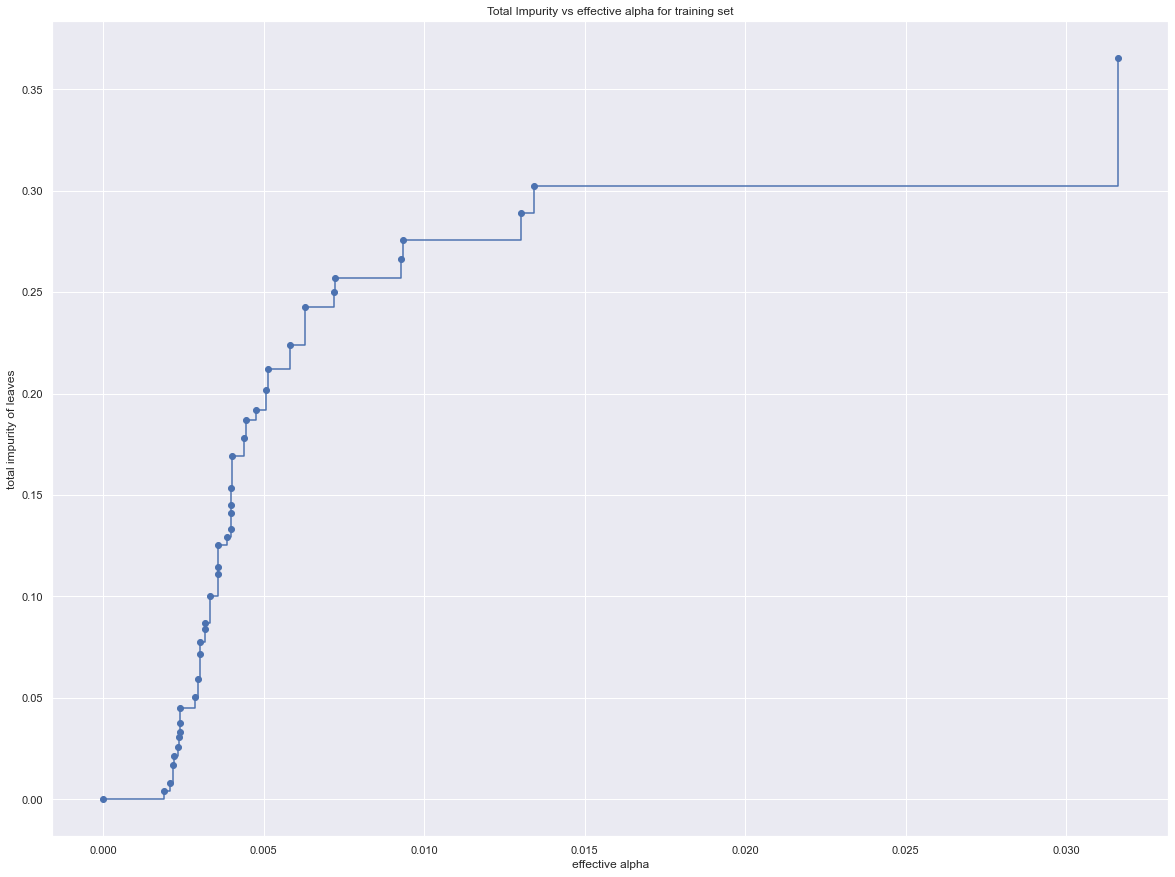

In [84]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [85]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08264664327968041


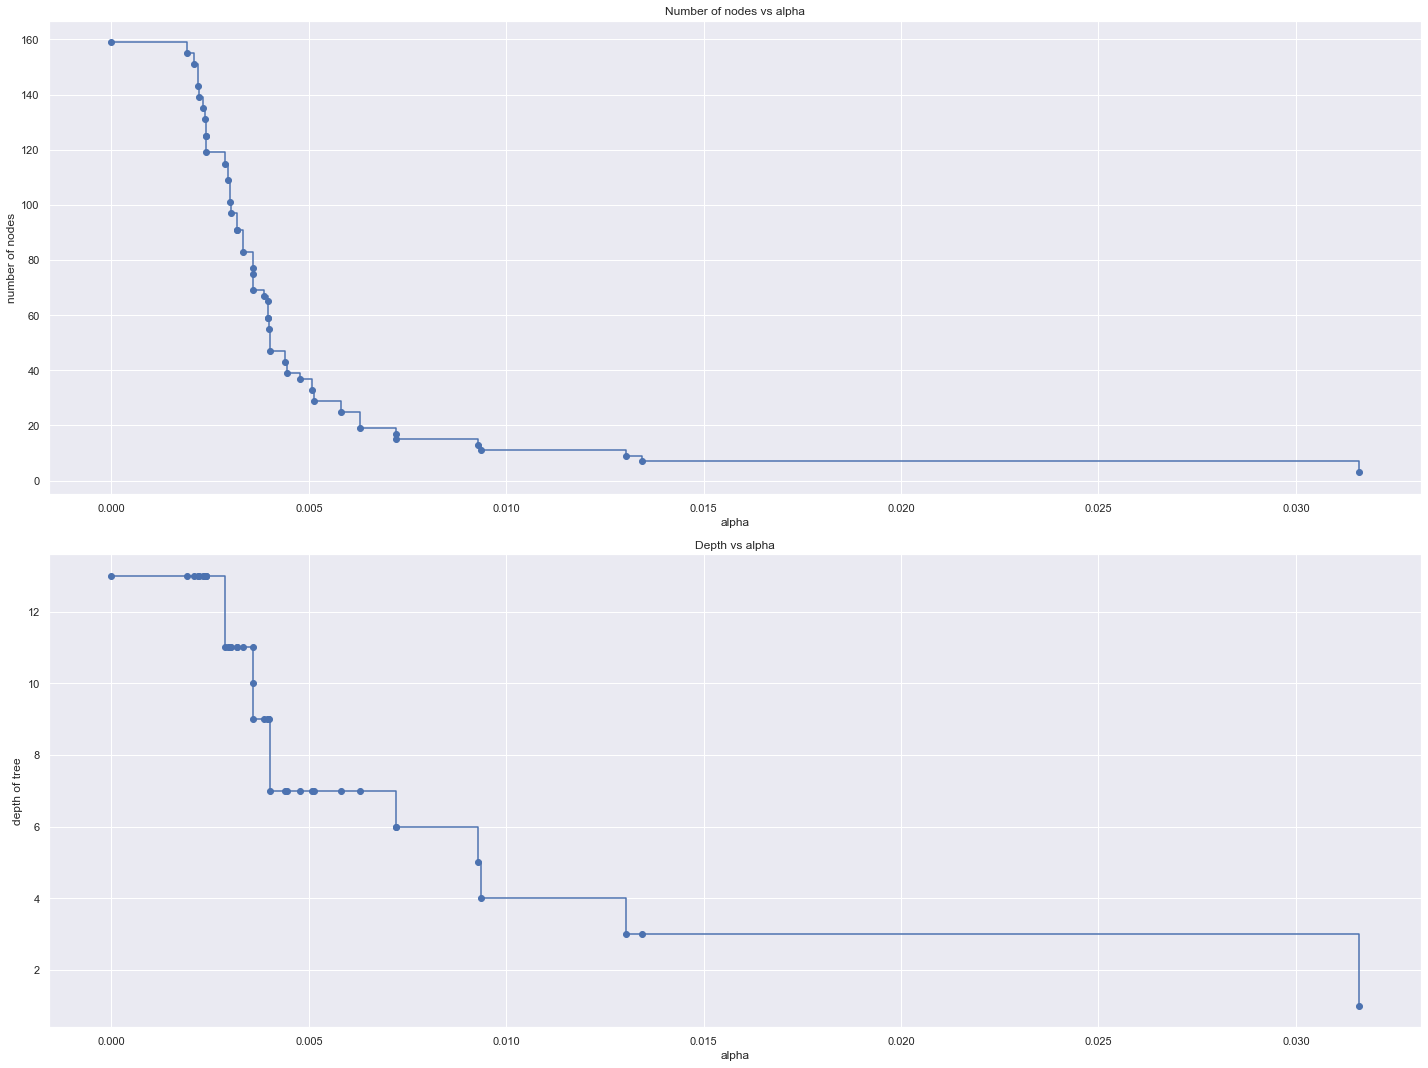

In [86]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

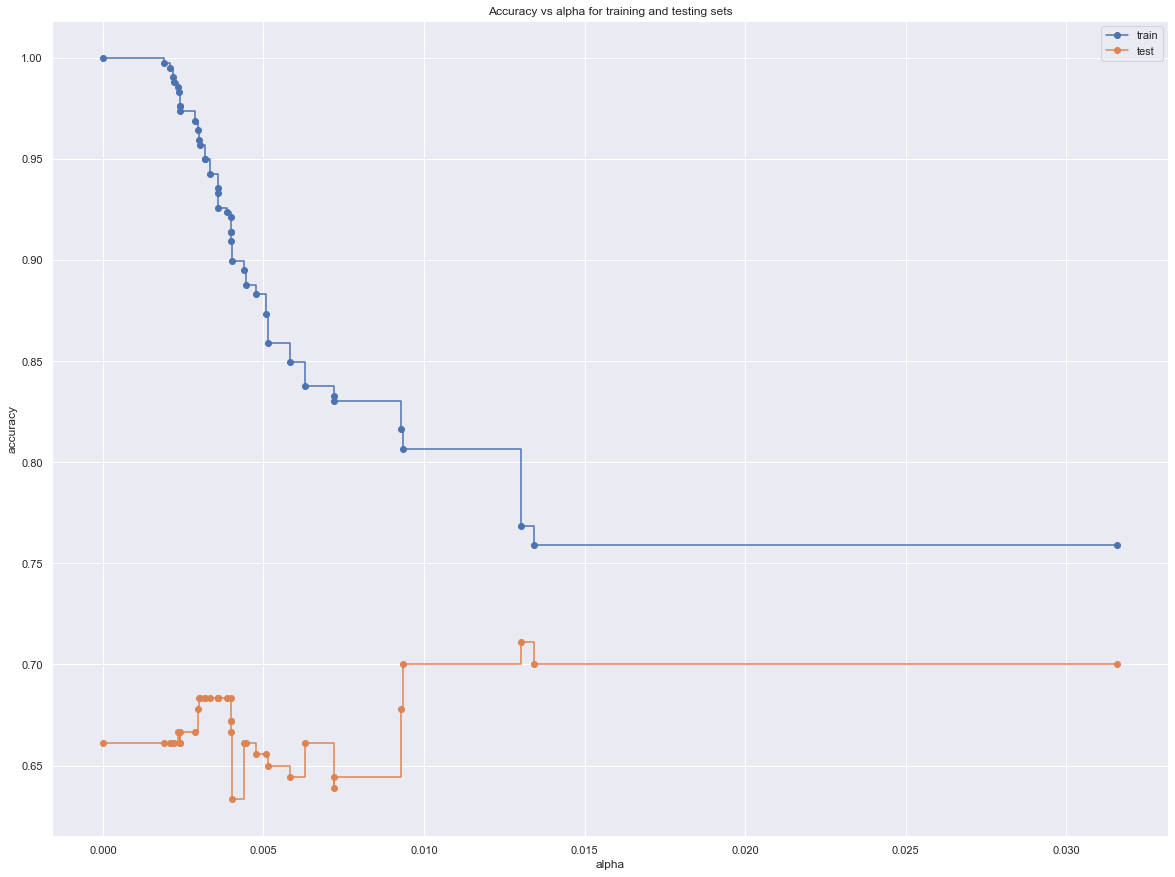

In [87]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<a id="5.3"></a>
# 5.3 Random Forest:
****

## ***Random Forest***: 

> - It is a supervised learning strategy that can be used for both classificaton and regression. 
> - It a



## ***Why I chose  Random Forest***: 

> - It works best with classification.


In [88]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [89]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7661111111111111
{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 155}
RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=155)


In [90]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8781302170283807

In [91]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78       114
           1       0.63      0.55      0.59        66

    accuracy                           0.72       180
   macro avg       0.69      0.68      0.69       180
weighted avg       0.71      0.72      0.71       180



In [92]:
# Initialise the model
rf_grid = grid.best_estimator_

# Fit the model with train set
decision_tree = rf_grid.fit(X_train,y_train)

# Use the test set to predict
y_pred = decision_tree.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7166666666666667

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>7. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [What Are Platelets and Why Are They Important?](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important#:~:text=A%20normal%20platelet%20count%20ranges,complete%20blood%20count%20(CBC).)

<a id="Link2"></a>
- [2] [What's a normal resting heart rate?](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link4"></a>
- [4] [Assessing Your Weight](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.)

<a id="Link5"></a>
- [5] [StandardScaler, MinMaxScaler and RobustScaler techniques – ML](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=StandardScaler%20follows%20Standard%20Normal%20Distribution,negative%20values%20in%20the%20dataset.)